# Análsisi de métricas de negocio Y.Afisha

## Introducción 
En este proyecto se hará un análisis para la empresa de Y.Afisha. El objetivo del mismo es ayudar a optimizar los gastos de marketing dentro de la empresa.
Para esto se obtienen 3 datasets los cuales son registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018; un archivo con los pedidos en este periodo y estadísticas de gastos de marketing.

Una vez se halla realizado el análisis y limpieza de datos, se procederá a avriguar como afectan al negocio las siguientes variables:

- cómo los clientes usan el servicio
- cuándo empiezan a comprar
- cuánto dinero aporta cada cliente a la compañía
- cuándo los ingresos cubren el costo de adquisición de los clientes

In [1]:
#Importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st 
import seaborn as sns

In [2]:
#Leer datasets 
visits = pd.read_csv("/datasets/visits_log_us.csv")
costs = pd.read_csv("/datasets/costs_us.csv")
orders = pd.read_csv("/datasets/orders_log_us.csv")

## Exploración y limpieza de datos. 

### Exploración inicial

In [3]:
#Revisar datos de dataset visits
visits.info() 
visits.describe()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#Revisar uso de memoria para optimización 
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
#Revisar datos de dataset orders
orders.info() 
orders.describe()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
#Revisar uso de memoria para optimización 
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [7]:
#Revisar datos de dataset cost
costs.info() 
costs.describe()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
#Revisar uso de memoria para optimización 
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


#### Hallazgos sobre exploración inicial 
En la exploración inicial vemos que los datos del dataset visits, tiene un espacio importante en la memoria por lo que se debe cambiar los tipos de datos tipo object a category y los datos de fecha a datetime para reducir el tamaño del dataset. 
En el segundo dataset (orders) podemos cambiar el tipo de datos de las fechas del tipo object a datetime. 
Finalmente en el último dataset (costs) vemos que tiene poco espacio en la memoria aunque la columna dt, tiene tipo object por lo que se debe cambiar a tipo datetime para mejorar el análisis.  
Por otro lado, observamos que los datasets no contienen valores ausentes. 

### Limpieza y corrección de datos

In [9]:
#Corregir tipo de datos en visits
visits['Device'] = visits['Device'].astype('category')
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [10]:
#Corregir tipo de datos en orders
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

In [11]:
#Corregir tipo de datos en costs
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [12]:
#Verificar optimizacion de datos
visits.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [13]:
#Verificar optimizacion de datos
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
#Verificar optimizacion de datos
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [15]:
#revisar duplicados en visits 
visits.duplicated().sum()

0

In [16]:
#revisar duplicados en orders 
orders.duplicated().sum()

0

In [17]:
#revisar duplicados en costs
costs.duplicated().sum()

0

In [18]:
#revisar otros duplicados en visits 
visits['Device'].unique()

['touch', 'desktop']
Categories (2, object): ['touch', 'desktop']

### Hallazgos sobre valores duplicados y nulos
En este caso no se hallaron valores duplicados, en los datasets, no habiendo duplicados en el conteo mediante el método duplicated() o bien mediante el método unique() en las variables categóricas donde pudieran tener errores ortógraficos o duplicados por diferencias de escritura. 
Por ende se considera que los datos se encuentran limpios y optimizados para el análisis. 

## Análisis de datos 

###  Análisis de visitas

In [19]:
#visitas: 

#¿Cuántas personas lo usan cada día, semana y mes?
#Primero generamos columnas para cada caso
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.isocalendar().week
visits['session_day'] = visits['Start Ts'].dt.day
visits['session_year'] = visits['Start Ts'].dt.year

visits['session_date'] = visits['Start Ts'].dt.date
print(visits.head())


    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_month  session_week  session_day  \
0  16879256277535980062             12            51           20   
1    104060357244891740              2             8           19   
2   7459035603376831527              7            26            1   
3  16174680259334210214              5            20           20   
4   9969694820036681168             12            52           27   

   session_year session_date  
0          2017   2017-12-20  
1          2018   2018-02-19  
2          2017   2017-07-01  
3          2018   2018-05-20  
4          2017   2017-12-27  


In [20]:
#Calculamos las tres métricas para conocer número de usuarios activos:
#DAU (usuarios activos diarios)
dau_total= visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
#WAU (usuarios activos semanales)
wau_total = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
#MAU (usuarios activos mensuales)
mau_total = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

print(int(dau_total) , ' personas usan el servicio cada día.')
print(int(wau_total) , ' personas usan el servicio cada semana.')
print(int(mau_total) , ' personas usan el servicio cada mes.')

907  personas usan el servicio cada día.
5716  personas usan el servicio cada semana.
23228  personas usan el servicio cada mes.


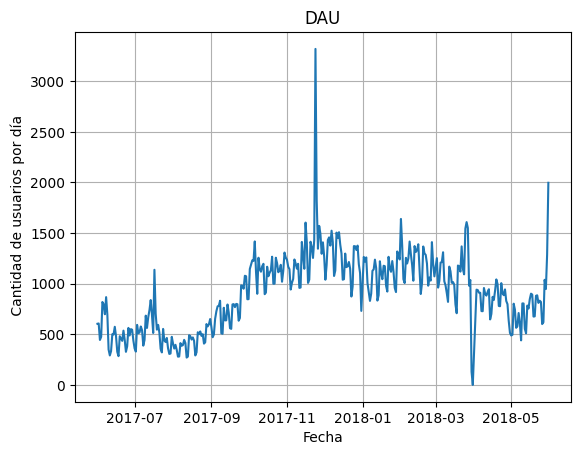

In [21]:
dau_graph = visits.groupby('session_date').agg({'Uid': 'nunique'})
dau_graph.plot( title= 'DAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por día', 
                 legend = False, 
                 grid = True)
plt.show()

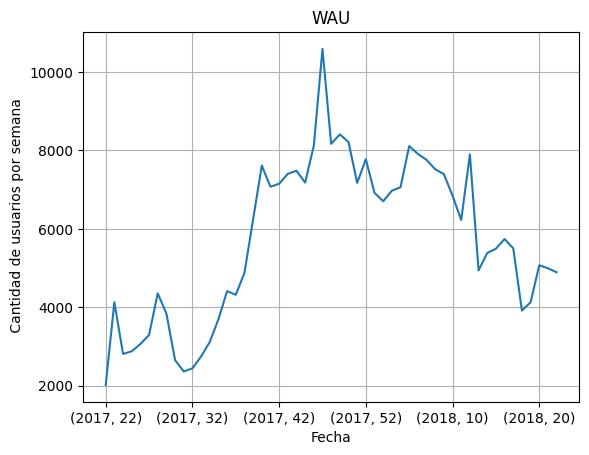

In [22]:
wau_graph = visits.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'})
wau_graph.plot( title= 'WAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por semana', 
                 legend = False, 
                 grid = True)
plt.show()

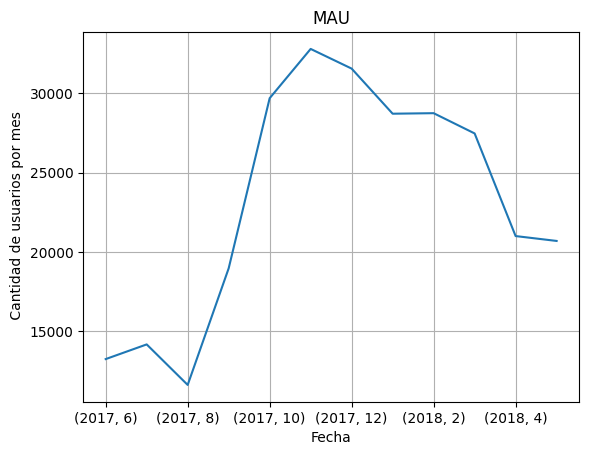

In [23]:
mau_graph = visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'})
mau_graph.plot( title= 'MAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por mes', 
                 legend = False, 
                 grid = True)
plt.show()

In [24]:
#¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
sessions_per_user = visits.groupby(['session_date']).agg(
    {'Uid': ['count', 'nunique']}
)
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = (
    sessions_per_user['n_sessions'] / sessions_per_user['n_users']
)
print(sessions_per_user)

              n_sessions  n_users  sessions_per_user
session_date                                        
2017-06-01           664      605           1.097521
2017-06-02           658      608           1.082237
2017-06-03           477      445           1.071910
2017-06-04           510      476           1.071429
2017-06-05           893      820           1.089024
...                  ...      ...                ...
2018-05-27           672      620           1.083871
2018-05-28          1156     1039           1.112608
2018-05-29          1035      948           1.091772
2018-05-30          1410     1289           1.093871
2018-05-31          2256     1997           1.129695

[364 rows x 3 columns]


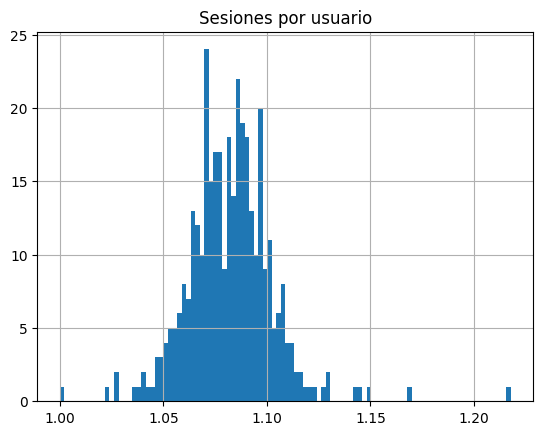

In [25]:
sessions_per_user['sessions_per_user'].hist(bins=100)
plt.title('Sesiones por usuario')
plt.show()

In [26]:
#¿Cuál es la duración de cada sesión?
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds
print(visits['session_duration_sec'].mean())

643.506488592098


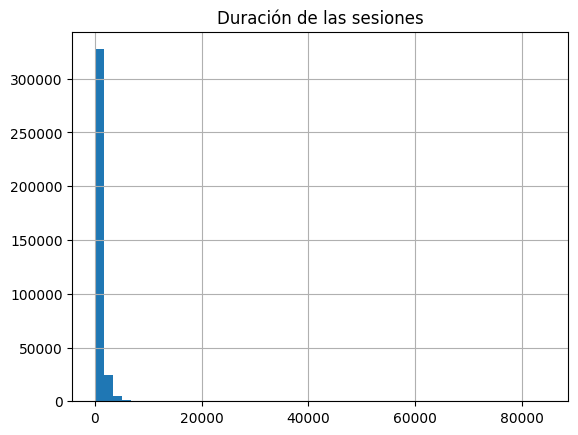

In [27]:
visits['session_duration_sec'].hist(bins=50)
plt.title('Duración de las sesiones')
plt.show()

In [28]:
print(int(visits['session_duration_sec'].mode()))

60


In [29]:
#¿Con qué frecuencia los usuarios y las usuarias regresan?
#Calculamos la métrica sticky factor 
sticky_wau = dau_total / wau_total * 100
print('Porcentaje de usaurios que regresan a la aplicación cada semana:', int(sticky_wau), '%')
sticky_mau = dau_total / mau_total * 100
print('Porcentaje de usaurios que regresan a la aplicación cada mes:', int(sticky_mau), '%')


Porcentaje de usaurios que regresan a la aplicación cada semana: 15 %
Porcentaje de usaurios que regresan a la aplicación cada mes: 3 %


#### Hallazgos sobre análisis de visitas

Para este caso observamos que 
- 907  personas usan el servicio cada día.
- 5716  personas usan el servicio cada semana.
- 23228  personas usan el servicio cada mes.

Siendo que este tipo de datos puede ser bueno pero al revisar las sesiones diarias de usuarios y retención, observamos que hay solo una sesión diaria aproxiamdamente, siendo factible este hecho, y vemos que la mayoría de los usuarios salvo casos exepcioanales usan el servicio 1 minuto al día. 
Igualmente podemos ver que hay poca retención ya que solo el 15% de los usuarios tiene más sesiones en la semana y solo el 3% tiene más sesiones al mes. 

### Análisis de ventas

In [30]:
#Creamos otro dataframe con los primeros días de cada orden
events = pd.DataFrame()
events['first_order'] = orders.groupby(['Uid'])['Buy Ts'].min()
#Recuperamos información del datest visits para conocer la primera sesión de cada usuario 
events['first_session'] = visits.groupby(['Uid'])['session_date'].min()
events.head()

,first_order,first_session
Uid,,
313578113262317,2018-01-03 21:51:00,2017-09-18
1575281904278712,2017-06-03 10:13:00,2017-06-03
2429014661409475,2017-10-11 18:33:00,2017-10-11
2464366381792757,2018-01-28 15:54:00,2018-01-27
2551852515556206,2017-11-24 10:14:00,2017-11-24


In [31]:
#Creamos el embudo para conocer el número de usuarios de compra 
step_1 = ~events['first_session'].isna()
step_2 = step_1 & (events['first_order'] > events['first_session'])
n_pageview = events[step_1].shape[0]
n_add_to_cart = events[step_2].shape[0]

In [32]:
print('Inicios de sesión:', n_pageview)
print('Se agregó una orden:', n_add_to_cart)

Inicios de sesión: 36523
Se agregó una orden: 11484


In [33]:
events['days_to_buy']=(
    (pd.to_datetime(events['first_order'])-pd.to_datetime(events['first_session']))
    /np.timedelta64(1,'D')).astype('int')
events.head()

,first_order,first_session,days_to_buy
Uid,,,
313578113262317,2018-01-03 21:51:00,2017-09-18,107
1575281904278712,2017-06-03 10:13:00,2017-06-03,0
2429014661409475,2017-10-11 18:33:00,2017-10-11,0
2464366381792757,2018-01-28 15:54:00,2018-01-27,1
2551852515556206,2017-11-24 10:14:00,2017-11-24,0


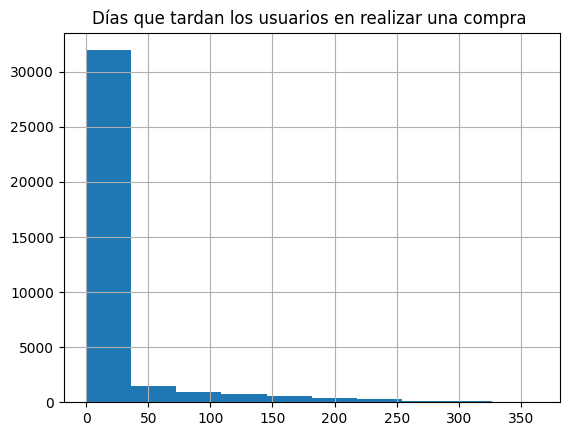

In [34]:
#creamos un histograma para visualizar mejor la distribución de caunto tiempo tarda la los usuarios en realizar una compra 
events['days_to_buy'].hist(bins=10)
plt.title('Días que tardan los usuarios en realizar una compra ')
plt.show()

In [35]:
#¿Cuántos pedidos hacen durante un período de tiempo dado?

In [36]:
#cohort por mes
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min()
first_order_date_by_customers.name = 'first_order_date'
print(first_order_date_by_customers.head())


Uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]


In [37]:
#Añadimos columnas al dadtaframe orders
orders = orders.join(first_order_date_by_customers,on='Uid', how='left',lsuffix='_left', rsuffix='_right')
print(orders.head())

               Buy Ts  Revenue                   Uid    first_order_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00


In [38]:
#Convertimso a mes y agregamos columnas first-order-month & order-month
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head()

,Buy Ts,Revenue,Uid,first_order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [39]:
#Designamos el tamaño de las cohortes
cohort_month = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_month.columns=['first_order_month','cohort_size']
cohort_month

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [40]:
#Se crea un nuevo df para agrupar por cohort de la primer compra del mes
order_cohorts = orders.groupby(['first_order_month','order_month'])['Revenue'].count().reset_index()
order_cohorts.columns=['first_order_month','order_month','orders']

In [41]:
#se utiliza el metod merge para cruzar el cohort con las compras del mes
order_cohorts = order_cohorts.merge(cohort_month,on=['first_order_month'])
order_cohorts.head()

,first_order_month,order_month,orders,cohort_size
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023
2,2017-06-01,2017-08-01,174,2023
3,2017-06-01,2017-09-01,226,2023
4,2017-06-01,2017-10-01,292,2023


In [42]:
#Se calcula la cantidad de compras dentro del cohrt restando las ordenes mensiales a la primera orden 
order_cohorts['age_month'] = ((order_cohorts['order_month'] - order_cohorts['first_order_month']) 
                              / np.timedelta64(1,'M')).round()
order_cohorts['orders_per_buyer']=order_cohorts['orders']/order_cohorts['cohort_size']
order_cohorts

,first_order_month,order_month,orders,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,176,3533,2.0,0.049816
75,2018-04-01,2018-04-01,2495,2276,0.0,1.096221
76,2018-04-01,2018-05-01,195,2276,1.0,0.085677
77,2018-05-01,2018-05-01,3249,2988,0.0,1.087349


In [43]:
#Creamos una piviot table 
table_order =order_cohorts.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum')

table_order.fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.14434,0.107761,0.136431,0.086011,0.104795,0.07563,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.01248,0.027561,
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,,
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,,,
2017-10-01,1.143779,0.07235,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,,,,
2017-11-01,1.179368,0.09728,0.044597,0.051703,0.033325,0.014457,0.024994,,,,,
2017-12-01,1.152635,0.061602,0.046087,0.04084,0.019621,0.023956,,,,,,
2018-01-01,1.121554,0.06641,0.047139,0.018974,0.023125,,,,,,,
2018-02-01,1.121611,0.060805,0.022733,0.019173,,,,,,,,


In [44]:
#Aplicamos método cumsum para obtener el total de las compras 
cohort_pivot=order_cohorts.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_pivot.round().fillna('')


age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2017-07-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,
2017-08-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,,
2017-09-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,,,
2017-10-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,,,,
2017-11-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,,,,,
2017-12-01,1.0,1.0,1.0,1.0,1.0,1.0,,,,,,
2018-01-01,1.0,1.0,1.0,1.0,1.0,,,,,,,
2018-02-01,1.0,1.0,1.0,1.0,,,,,,,,


<div class="alert alert-block alert-info">
Se realiza heatmap para visualizar cohortes
</div>

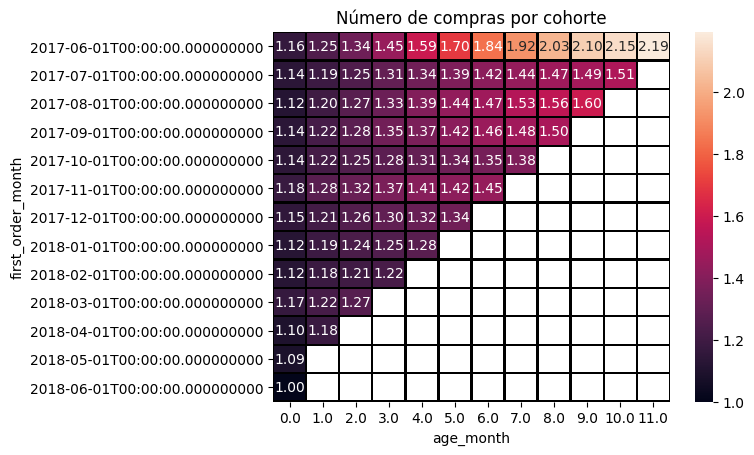

In [45]:
#Agregmos grafica heatmap para mejorar la visualizaición y evaluar el redimeinto de las cohortes y poder sacar conclusiones para cada mes
plt.title('Número de compras por cohorte')
sns.heatmap(
    cohort_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

In [46]:
#¿Cuál es el tamaño promedio de compra?
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Buy Ts             50415 non-null  datetime64[ns]
 1   Revenue            50415 non-null  float64       
 2   Uid                50415 non-null  uint64        
 3   first_order_date   50415 non-null  datetime64[ns]
 4   order_month        50415 non-null  datetime64[ns]
 5   first_order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.3 MB


In [47]:
#Convertimos first_order_month y order_month a datetime 
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]') 
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]') 

In [48]:
#Agrupamos las ordenes por cohortes mensuales
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month', 'order_month']
).agg({'Revenue': 'sum', 'Uid': 'count'})
print(orders_grouped_by_cohorts.head())


                               Revenue   Uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2354
                  2017-07-01    981.82   177
                  2017-08-01    885.34   174
                  2017-09-01   1931.30   226
                  2017-10-01   2068.58   292


In [49]:
#Se calcula el monto de compras por usuario
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['Revenue']
    / orders_grouped_by_cohorts['Uid']
)

<div class="alert alert-block alert-info">
Método cambiado a count
</div>

In [50]:
orders_grouped_by_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 79 entries, (Timestamp('2017-06-01 00:00:00'), Timestamp('2017-06-01 00:00:00')) to (Timestamp('2018-06-01 00:00:00'), Timestamp('2018-06-01 00:00:00'))
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Revenue           79 non-null     float64
 1   Uid               79 non-null     int64  
 2   revenue_per_user  79 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.3 KB


In [51]:
#encontrar el ciclo de vida de la cohorte
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['order_month']
    - orders_grouped_by_cohorts['first_order_month']
)
orders_grouped_by_cohorts['cohort_lifetime'].head()
orders_grouped_by_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   first_order_month  79 non-null     datetime64[ns] 
 1   order_month        79 non-null     datetime64[ns] 
 2   Revenue            79 non-null     float64        
 3   Uid                79 non-null     int64          
 4   revenue_per_user   79 non-null     float64        
 5   cohort_lifetime    79 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 3.8 KB


In [52]:
#Convertiremos este tipo al número de meses
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')


In [53]:
#convertimos a int
orders_grouped_by_cohorts['cohort_lifetime'] = (
    orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int'))
orders_grouped_by_cohorts.head()

,first_order_month,order_month,Revenue,Uid,revenue_per_user,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2354,4.060106,0
1,2017-06-01,2017-07-01,981.82,177,5.547006,1
2,2017-06-01,2017-08-01,885.34,174,5.088161,2
3,2017-06-01,2017-09-01,1931.30,226,8.545575,3
4,2017-06-01,2017-10-01,2068.58,292,7.084178,4


In [54]:
#obtener tabla 
revenue_per_user_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean',
)
revenue_per_user_pivot.fillna(' ')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.060106,5.547006,5.088161,8.545575,7.084178,6.825321,6.966449,6.761839,5.279009,8.009869,12.038125,6.042093
2017-07-01,5.287123,6.4461,9.992083,6.637596,4.721806,3.659512,3.789508,5.4544,5.34569,11.79,5.648302,
2017-08-01,4.715479,5.987315,6.2812,6.617901,7.962941,6.265323,5.89,7.11359,8.702826,5.598478,,
2017-09-01,4.967109,13.171187,8.351056,62.570244,15.430448,15.321835,16.76713,11.206607,7.785574,,,
2017-10-01,4.374738,7.405127,5.127469,5.590246,5.098992,5.071553,4.280233,4.00912,,,,
2017-11-01,4.370717,4.103955,4.47467,6.284976,4.441471,3.72678,4.598235,,,,,
2017-12-01,4.110746,4.226741,20.072772,26.084358,15.948488,14.111048,,,,,,
2018-01-01,3.687417,4.438482,6.454969,7.524844,2.711282,,,,,,,
2018-02-01,3.706266,4.576486,3.453735,3.867143,,,,,,,,


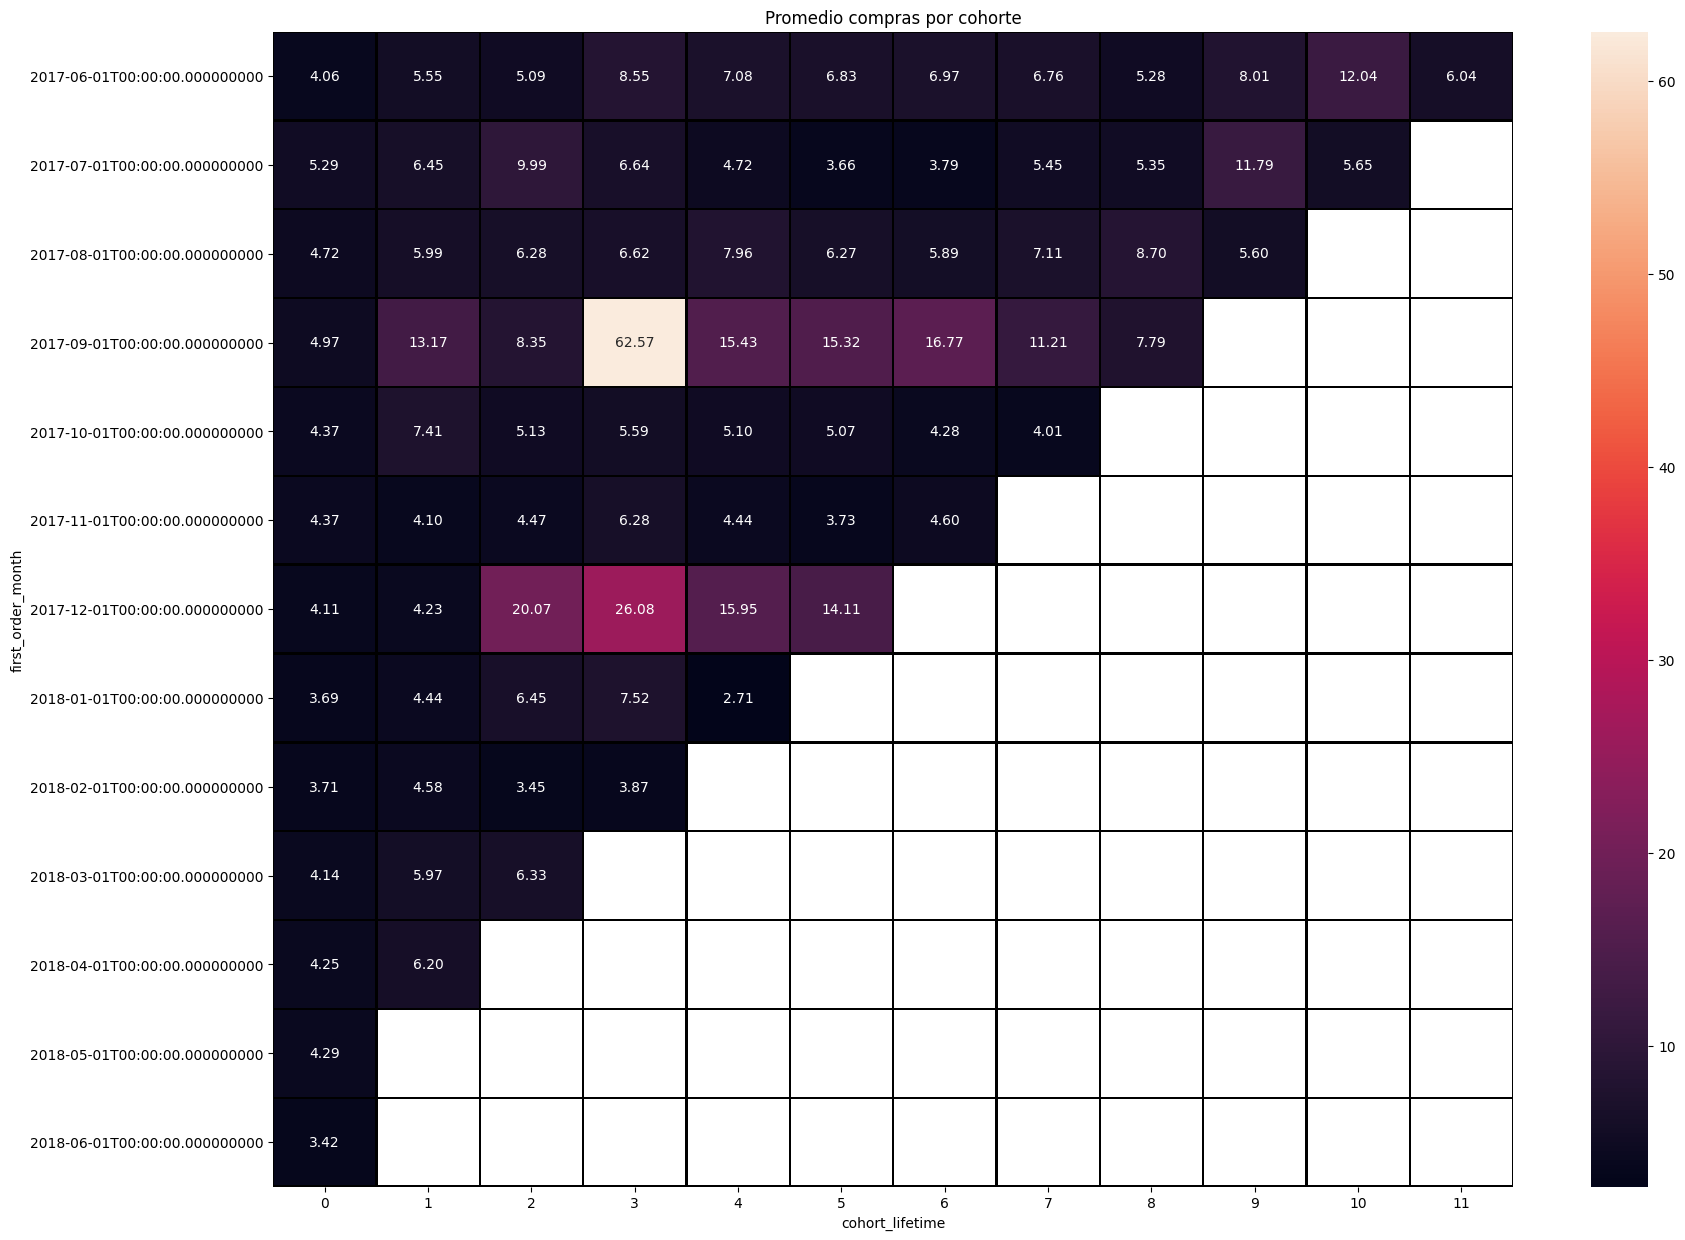

In [55]:
plt.figure(figsize=(20, 15))
plt.title('Promedio compras por cohorte')
sns.heatmap(
    revenue_per_user_pivot,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

In [56]:
#¿Cuánto dinero traen? (LTV)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Buy Ts             50415 non-null  datetime64[ns]
 1   Revenue            50415 non-null  float64       
 2   Uid                50415 non-null  uint64        
 3   first_order_date   50415 non-null  datetime64[ns]
 4   order_month        50415 non-null  datetime64[ns]
 5   first_order_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.3 MB


In [57]:
#Se recupera el mes de la primera compra de cada cliente
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]') 

In [58]:
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

In [59]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']


In [60]:
#Establecemos margen
margin_rate = 0.4
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_.head()


,Buy Ts,Revenue,Uid,first_order_date,order_month,first_order_month_x,first_order_month_y
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [61]:
#Quitamos columna extra y renombramos 
orders_ = orders_.drop(['first_order_month_x'], axis=1)
orders_ = orders_.rename(columns={"first_order_month_y": "first_order_month"})
orders_.head()

,Buy Ts,Revenue,Uid,first_order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [62]:
# agrupa las ordenes en cohortes mensuales
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

In [63]:
#Se combinan los df para obtener  datos sobre cuántos usuarios realizaron sus primeras compras en cada mes 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [64]:
# Se calcula el beneficio bruto
report['gp'] = report['Revenue'] * margin_rate 
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [65]:
report

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0
1,2017-06-01,2023,2017-07-01,981.82,392.728,1
2,2017-06-01,2023,2017-08-01,885.34,354.136,2
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,445.948,2
75,2018-04-01,2276,2018-04-01,10600.69,4240.276,0
76,2018-04-01,2276,2018-05-01,1209.92,483.968,1
77,2018-05-01,2988,2018-05-01,13925.76,5570.304,0


In [66]:
# Se calcula el LTV para las cohortes
report['ltv'] = report['gp'] / report['n_buyers'] 

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)
#Se obtienen los valores para la tabla dinámica
result.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,0.194131,0.175055,0.381869,0.409012,0.294201,0.380176,0.232637,0.221285,0.242315,0.228504,0.102742
2017-07-01,2.404087,0.134084,0.249412,0.14359,0.070717,0.062419,0.048083,0.056728,0.064493,0.058858,0.062269,
2017-08-01,2.110607,0.188797,0.183393,0.156511,0.19762,0.113416,0.084266,0.162003,0.116885,0.075191,,
2017-09-01,2.257812,0.447034,0.208372,1.590317,0.160223,0.258827,0.280643,0.09726,0.073602,,,
2017-10-01,2.001493,0.214305,0.076558,0.062858,0.060624,0.048145,0.033926,0.046188,,,,
2017-11-01,2.061873,0.159693,0.079823,0.129981,0.059205,0.021552,0.045971,,,,,
2017-12-01,1.895276,0.10415,0.370039,0.42611,0.125172,0.135219,,,,,,
2018-01-01,1.654254,0.117903,0.121712,0.057111,0.025079,,,,,,,
2018-02-01,1.662795,0.11131,0.031406,0.029658,,,,,,,,


In [67]:
# CÓDIGO REVISOR
result.cumsum(axis=1)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.889766,2.083897,2.258952,2.640821,3.049833,3.344034,3.724210,3.956846,4.178131,4.420447,4.648951,4.751694
2017-07-01,2.404087,2.538172,2.787584,2.931174,3.001891,3.064310,3.112393,3.169121,3.233614,3.292472,3.354742,NaN
2017-08-01,2.110607,2.299404,2.482797,2.639308,2.836928,2.950345,3.034610,3.196613,3.313498,3.388689,NaN,NaN
2017-09-01,2.257812,2.704846,2.913218,4.503535,4.663758,4.922585,5.203228,5.300488,5.374091,NaN,NaN,NaN
2017-10-01,2.001493,2.215798,2.292356,2.355214,2.415838,2.463982,2.497909,2.544097,NaN,NaN,NaN,NaN
2017-11-01,2.061873,2.221566,2.301389,2.431370,2.490575,2.512126,2.558098,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.895276,1.999426,2.369465,2.795575,2.920747,3.055965,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.654254,1.772158,1.893870,1.950981,1.976060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.662795,1.774105,1.805511,1.835168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Se halla el LTV de la primera cohorte sumando el valor de cada mes
LTV_cohort = result.loc['2017-06-01'].sum()
print("En promedio, cada cliente de la primera cohorte generó $", LTV_cohort.round() ,"en ingresos durante su ciclo de vida")

En promedio, cada cliente de la primera cohorte generó $ 5.0 en ingresos durante su ciclo de vida


#### Hallazgos sobre análisis de ventas. 
En primer lugar observamos que los usaurios por lo comun realizan las compras el mismo día que tiene su primera sesión, es decir son muy pocos los usaurios que realizan compras depués del primer día. 
Al agrupar los pedidos por cohortes mensuales observamos que entre enero y marzo se tiene una cierta estabilidad siendo el priermcohorte de 2017 el que contiene más compras, en general se mantiene con más ventas, solo teniendo un valor atíco en el cohorte de septiembre dobde vemos un valor muy alto en compras peron o saí en el número de ´rdenes.
Realizando el proceso de manera semanal observamos picos de ventas en la semana 40 y 45 entre octubre y noviembre, así mismo vemos que se generaron más ventas en la semana 22 en mayo, lo cual probablemente se debe a una campaña de marketing efectiva, probablemente despúes de la caída de ventas en marzo como se ve en la gráfica de meses. 
Al calcular un tamaño promedio de la compra observamos que los picos de mayor cantidad de ventas se genera en junio y agosto, así como en diciembre observamos pues que en el caso de junio hay una coincidencia que cantidad de compras y el temaño de las mismas, así como en los meses de final de año. 
Esto podría deberse a campañas de marketing efctivas o bien a factores externos, sin embargo aún falta data para sacar un conclusión de este tipo. 
Obteniendo el Life Time Value observamos que los clientes en el ciclo de vida se generean alrededor de $5. 

### Análisis de marketing

In [69]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

In [70]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [71]:

#Marketing:

In [72]:
#¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) 
Totals = costs.costs.sum()
print('Total de costos: $', Totals)

Total de costos: $ 329131.62


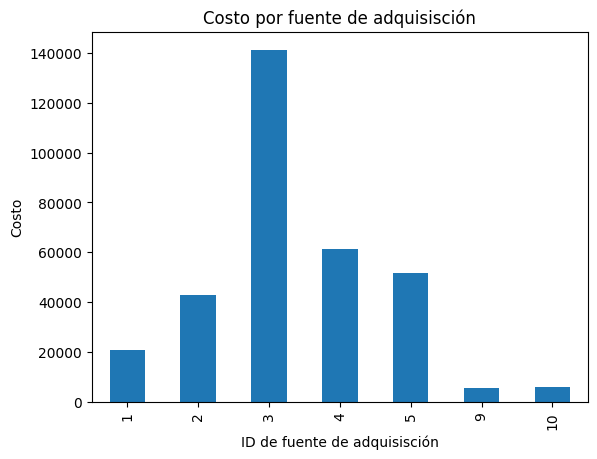

In [73]:
#Agrupamos po fuentes de adquisición 
cost_source = costs.groupby('source_id')['costs'].sum().reset_index()
#Trazamos grafica para mejorar visualización 
cost_source.plot(kind='bar', 
                 x = 'source_id', 
                 y = 'costs', 
                 title= 'Costo por fuente de adquisisción', 
                 xlabel = 'ID de fuente de adquisisción',
                 ylabel = 'Costo', 
                 legend = False
                 )
plt.show()

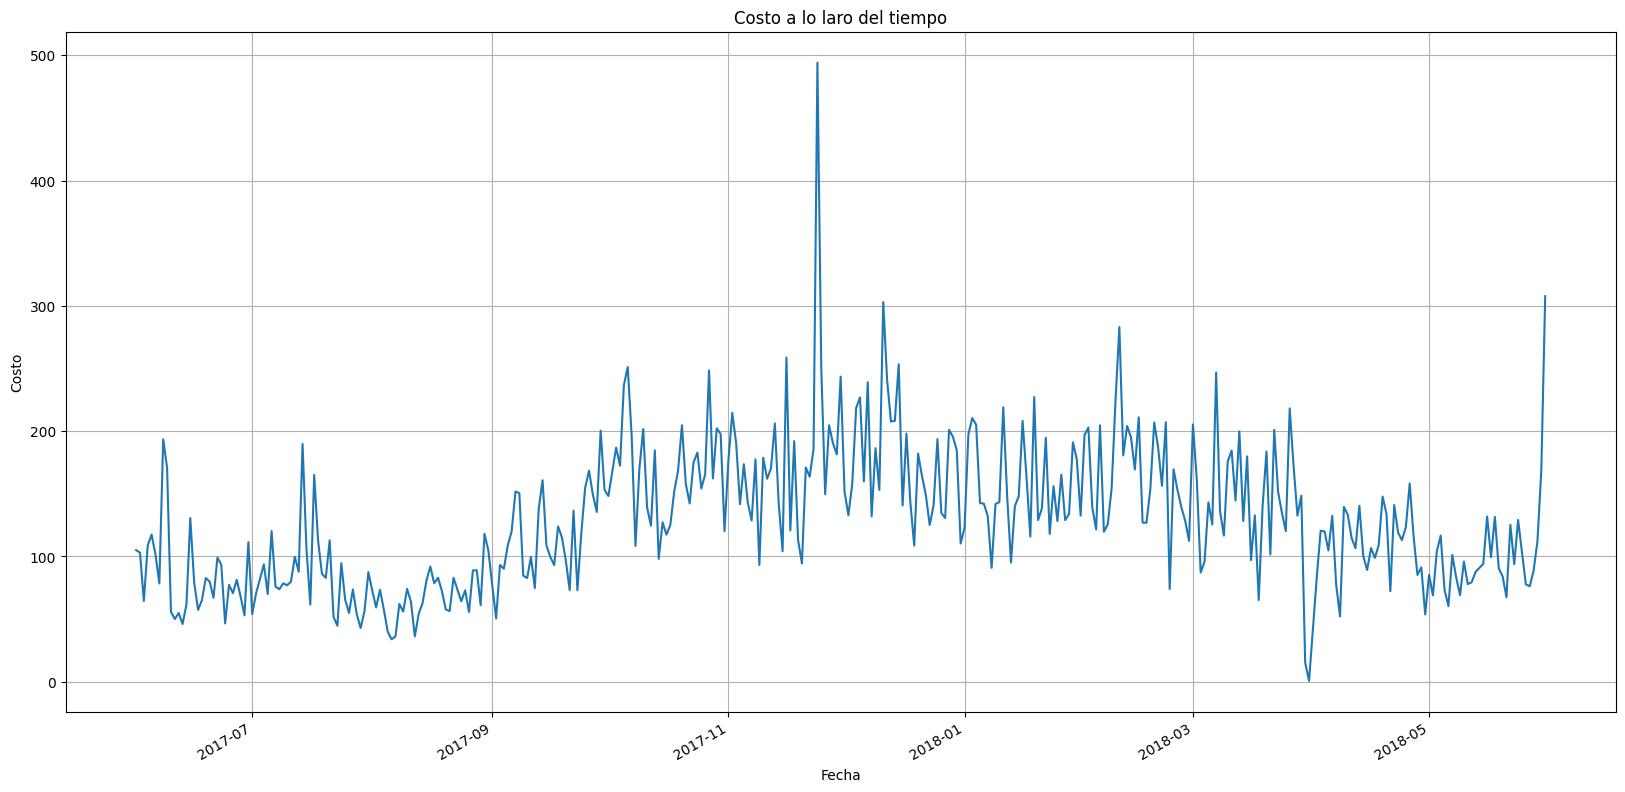

In [74]:
#Trazamos gráfica para visualizar costos a lo largo del tiempo 
cost_time = costs.groupby('dt')['costs'].mean().reset_index()
cost_time.plot(
                 x = 'dt', 
                 y = 'costs', 
                 title= 'Costo a lo laro del tiempo', 
                 xlabel = 'Fecha',
                 ylabel = 'Costo', 
                 legend = False,
                 figsize=(20,10), 
                 grid = True
                 )
plt.show()

In [75]:
#Calculamos el costo para cada mes
costs['cost_month'] = costs['dt'].dt.month
cost_month = costs.groupby('cost_month')['costs'].sum()
cost_month

cost_month
1     33518.52
2     32723.03
3     30415.27
4     22289.38
5     22224.27
6     18015.00
7     18240.59
8     14790.54
9     24368.91
10    36322.88
11    37907.88
12    38315.35
Name: costs, dtype: float64

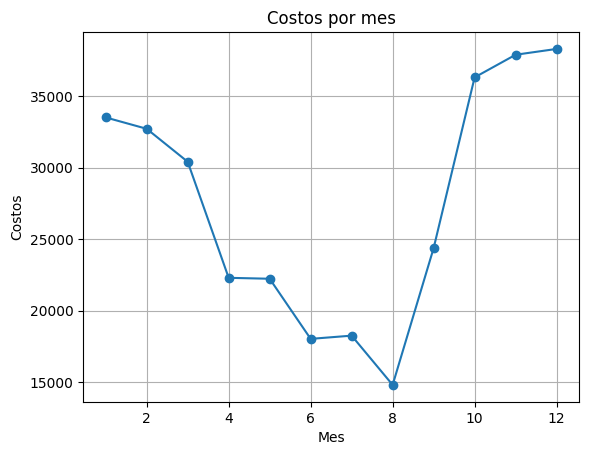

In [76]:
cost_month.plot(title='Costos por mes',
                xlabel = 'Mes', 
                ylabel = 'Costos',
                grid=True, 
                 marker="o"
                )
plt.show()

In [77]:
#Calculamos el costo para cada mes según la fuente de anuncio
monthly_cost_by_source_pivot = costs.pivot_table(
    index='source_id',
    columns='cost_month',
    values='costs',
    aggfunc='sum')
monthly_cost_by_source_pivot


cost_month,1,2,3,4,5,6,7,8,9,10,11,12
source_id,,,,,,,,,,,,
1,2186.18,2204.48,1893.09,1327.49,1467.61,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20
2,4157.74,4474.34,3943.14,2993.70,2689.44,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80
3,14808.78,14228.56,13080.85,9296.81,9411.42,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52
4,5832.79,5711.96,5961.87,4408.49,4214.21,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47
5,5371.52,5071.31,4529.62,3501.15,3669.56,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52
9,547.16,551.50,480.29,373.49,362.17,285.22,302.54,248.93,415.62,609.41,683.18,657.98
10,614.35,480.88,526.41,388.25,409.86,314.22,329.82,232.57,460.67,627.24,792.36,645.86


In [78]:
#¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC)

In [79]:
report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012


In [80]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     datetime64[ns]
 1   n_buyers           79 non-null     int64         
 2   order_month        79 non-null     datetime64[ns]
 3   Revenue            79 non-null     float64       
 4   gp                 79 non-null     float64       
 5   age                79 non-null     int64         
 6   ltv                79 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 4.9 KB


In [81]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [82]:
costs.head()

,source_id,dt,costs,cost_month,month
0,1,2017-06-01,75.20,6,2017-06-01
1,1,2017-06-02,62.25,6,2017-06-01
2,1,2017-06-03,36.53,6,2017-06-01
3,1,2017-06-04,55.00,6,2017-06-01
4,1,2017-06-05,57.08,6,2017-06-01


In [83]:
#Calculemos el CAC para el cohorte que utilizamos para calcular el LTV 
cohort_1 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte, en este caso el primer mes
costs_cohort = costs[costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_cohort = cohort_1['n_buyers'][0]
cac_cohort = costs_cohort / n_buyers_cohort
ltv_cohort   = result.loc['2017-06-01'].sum()

print('CAC =', cac_cohort)
print('LTV =', ltv_cohort)

CAC = 8.905091448344043
LTV = 4.751693524468611


In [84]:
#Calculammos costo por fuente
first_source = visits.sort_values('Start Ts').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['uid','first_source']
first_source.head()


,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [85]:
orders = orders.rename(columns={'Uid': 'uid'})
orders.head()


,Buy Ts,Revenue,uid,first_order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [86]:
orders = orders.merge(first_source,on=['uid'],how='left')
orders.head()

,Buy Ts,Revenue,uid,first_order_date,order_month,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,3


In [87]:
buyers_per_month_source = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns = ['month','source_id','buyers']
buyers_per_month_source.head()

,month,source_id,buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [88]:
buyers_per_month_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      86 non-null     datetime64[ns]
 1   source_id  86 non-null     int64         
 2   buyers     86 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.1 KB


In [89]:
marketing_by_month_source = costs.groupby(['month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.columns = ['month', 'source_id', 'costs']
marketing_by_month_source.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [90]:
marketing_by_month_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   month      84 non-null     datetime64[ns]
 1   source_id  84 non-null     int64         
 2   costs      84 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


In [91]:
CAC_per_month_source = marketing_by_month_source.merge(buyers_per_month_source, 
                                                       how='left', 
                                                       on=['month','source_id'])
CAC_per_month_source['CAC'] = CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

,month,source_id,costs,buyers,CAC
0,2017-06-01,1,1125.61,190,5.924263
1,2017-06-01,2,2427.38,235,10.329277
2,2017-06-01,3,7731.65,638,12.118574
3,2017-06-01,4,3514.80,413,8.510412
4,2017-06-01,5,2616.12,384,6.812813


In [92]:
CAC_source_mean = CAC_per_month_source.groupby(['source_id'])['CAC'].mean().reset_index()
CAC_source_mean

,source_id,CAC
0,1,7.212107
1,2,12.504068
2,3,13.802743
3,4,6.439374
4,5,7.451938
5,9,5.413892
6,10,4.867125


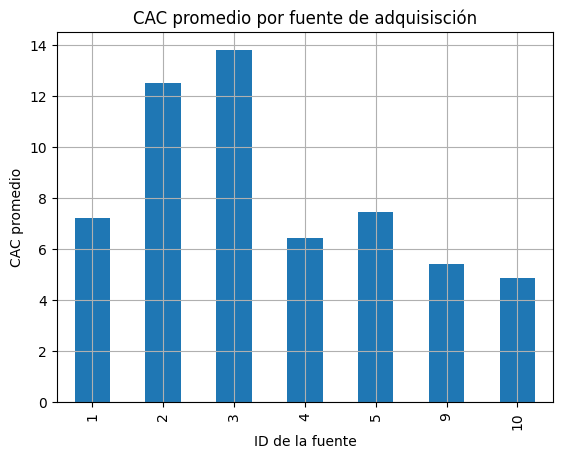

In [93]:
CAC_source_mean.plot(title='CAC promedio por fuente de adquisisción',
                      x= 'source_id',
                      y=  'CAC',
                xlabel = 'ID de la fuente', 
                ylabel = 'CAC promedio',
                grid=True, 
                kind = 'bar', 
                legend = False
                )
plt.show()

In [94]:
#¿Cuán rentables eran las inversiones? (ROMI)
#Agrpamos costos por mes 
monthly_costs_cohort = costs.groupby(['month'])['costs'].sum().reset_index()
monthly_costs_cohort .head()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [95]:
report_ = pd.merge(report, monthly_costs_cohort, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,2017-06-01,18015.0,8.905091


In [96]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2)
output.fillna(' ')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.212212,0.0218,0.019658,0.042882,0.04593,0.033037,0.042692,0.026124,0.024849,0.027211,0.02566,0.011537
2017-07-01,0.253449,0.014136,0.026294,0.015138,0.007455,0.00658,0.005069,0.005981,0.006799,0.006205,0.006565,
2017-08-01,0.195499,0.017488,0.016987,0.014497,0.018305,0.010505,0.007805,0.015006,0.010827,0.006965,,
2017-09-01,0.239133,0.047347,0.022069,0.168436,0.01697,0.027413,0.029724,0.010301,0.007796,,,
2017-10-01,0.239146,0.025606,0.009147,0.007511,0.007244,0.005753,0.004054,0.005519,,,,
2017-11-01,0.221972,0.017192,0.008593,0.013993,0.006374,0.00232,0.004949,,,,,
2017-12-01,0.216806,0.011914,0.04233,0.048744,0.014319,0.015468,,,,,,
2018-01-01,0.166469,0.011865,0.012248,0.005747,0.002524,,,,,,,
2018-02-01,0.185523,0.012419,0.003504,0.003309,,,,,,,,


In [97]:
data = output.cumsum(axis=1).mean(axis=0)

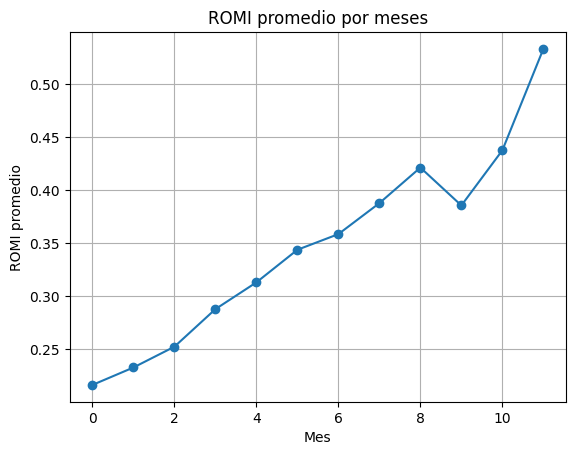

In [98]:
data.plot (title='ROMI promedio por meses',
                xlabel = 'Mes', 
                ylabel = 'ROMI promedio',
                grid=True, 
                legend = False, 
                marker="o"
                )
plt.show()

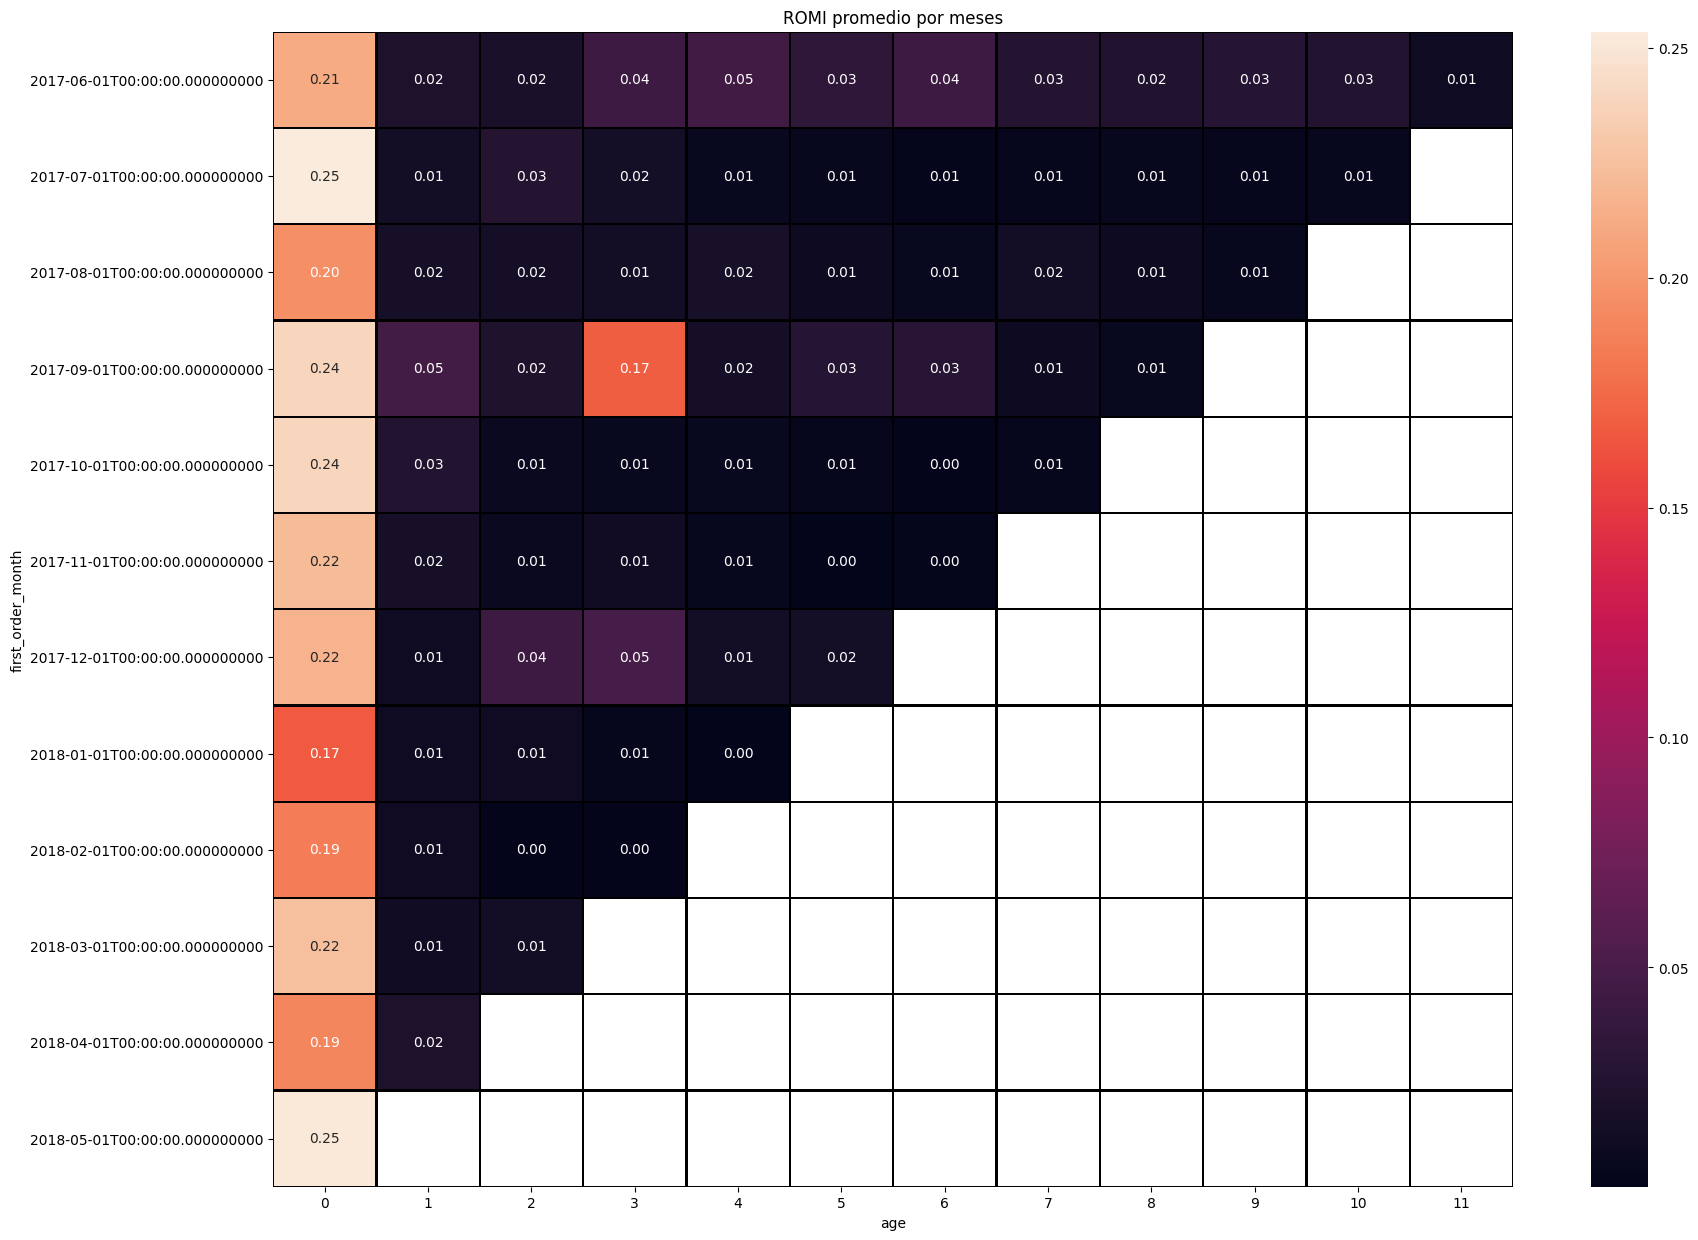

In [99]:
plt.figure(figsize=(20, 15))
plt.title('ROMI promedio por meses')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Oservamos que las cohortes tienen un ROMI  durante su primer mes de vida, pero esto va disminuyendo a lo largo del tiempo  hasta ser practicamente 0 en algunos casos

In [100]:
report_ = pd.merge(report, monthly_costs_cohort, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,month,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,2017-06-01,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,2017-06-01,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,2017-06-01,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,2017-06-01,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,2017-06-01,18015.0,8.905091


In [101]:
#romi por fuente 
#Recuperamos las columnas que usamos para calcualr el CAC por fuente y obtenemos el LTV 
buyers_per_month_source

,month,source_id,buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


In [102]:
marketing_by_month_source

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [103]:
#Obtenemos el ltv por fuente 
Report_per_month_source = marketing_by_month_source.merge(buyers_per_month_source, 
                                                       how='left', 
                                                       on=['month','source_id'])


In [104]:
revenue_per_month_source = orders.groupby(['first_order_month','first_source'])['Revenue'].sum().reset_index()
revenue_per_month_source.columns = ['month','source_id','revenue']
revenue_per_month_source.sample(30)

,month,source_id,revenue
32,2017-10-01,4,6024.99
50,2018-01-01,1,1672.31
35,2017-10-01,10,595.48
52,2018-01-01,3,4588.67
49,2017-12-01,10,338.73
40,2017-11-01,5,3607.99
27,2017-09-01,9,841.22
63,2018-02-01,10,319.02
48,2017-12-01,9,574.69
72,2018-04-01,2,1309.35


In [105]:
Report_per_month_source = Report_per_month_source.merge(revenue_per_month_source, 
                                                       how='left', 
                                                       on=['month','source_id'])
Report_per_month_source

,month,source_id,costs,buyers,revenue
0,2017-06-01,1,1125.61,190,6392.39
1,2017-06-01,2,2427.38,235,3915.26
2,2017-06-01,3,7731.65,638,3640.32
3,2017-06-01,4,3514.80,413,4992.67
4,2017-06-01,5,2616.12,384,4377.64
...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,3256.54
80,2018-05-01,4,4214.21,804,3802.91
81,2018-05-01,5,3669.56,497,2094.04
82,2018-05-01,9,362.17,60,223.05


In [106]:
#Hacemos merge con report para obtener los datos de ltv y cac de las cohortes,así como los gastos de cada mes
Report_per_month_source = Report_per_month_source.merge(report_, 
                                                       how='left', 
                                                       on=['month'])
Report_per_month_source

,month,source_id,costs_x,buyers,revenue,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs_y,cac
0,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,18015.00,8.905091
1,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,18015.00,8.905091
2,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,18015.00,8.905091
3,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,18015.00,8.905091
4,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,18015.00,8.905091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,3,9411.42,844,3256.54,2018-05-01,2988,2018-05-01,13925.76,5570.304,0,1.864225,22224.27,7.437841
542,2018-05-01,4,4214.21,804,3802.91,2018-05-01,2988,2018-05-01,13925.76,5570.304,0,1.864225,22224.27,7.437841
543,2018-05-01,5,3669.56,497,2094.04,2018-05-01,2988,2018-05-01,13925.76,5570.304,0,1.864225,22224.27,7.437841
544,2018-05-01,9,362.17,60,223.05,2018-05-01,2988,2018-05-01,13925.76,5570.304,0,1.864225,22224.27,7.437841


In [107]:
#renombramos columnas
Report_per_month_source = Report_per_month_source.rename(columns={'costs_x': 'costs_per_source', 
                                                                  'costs_y': 'costs',
                                                                  'buyers': 'buyers_per_source',
                                                                  'revenue': 'revenue_per_source',
                                                                 })

In [108]:
Report_per_month_source.head()

,month,source_id,costs_per_source,buyers_per_source,revenue_per_source,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,costs,cac
0,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,1.889766,18015.0,8.905091
1,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.194131,18015.0,8.905091
2,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.175055,18015.0,8.905091
3,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.381869,18015.0,8.905091
4,2017-06-01,1,1125.61,190,6392.39,2017-06-01,2023,2017-10-01,2068.58,827.432,4,0.409012,18015.0,8.905091


In [109]:
#Elaboramos una pivot table para conocer los gastos por cada cohorte según cada ID de fuente
output = Report_per_month_source.pivot_table(
    index='first_order_month', columns='source_id', values='costs_per_source', aggfunc='mean'
)
output.cumsum(axis=1).round(2)
output.fillna(' ')

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


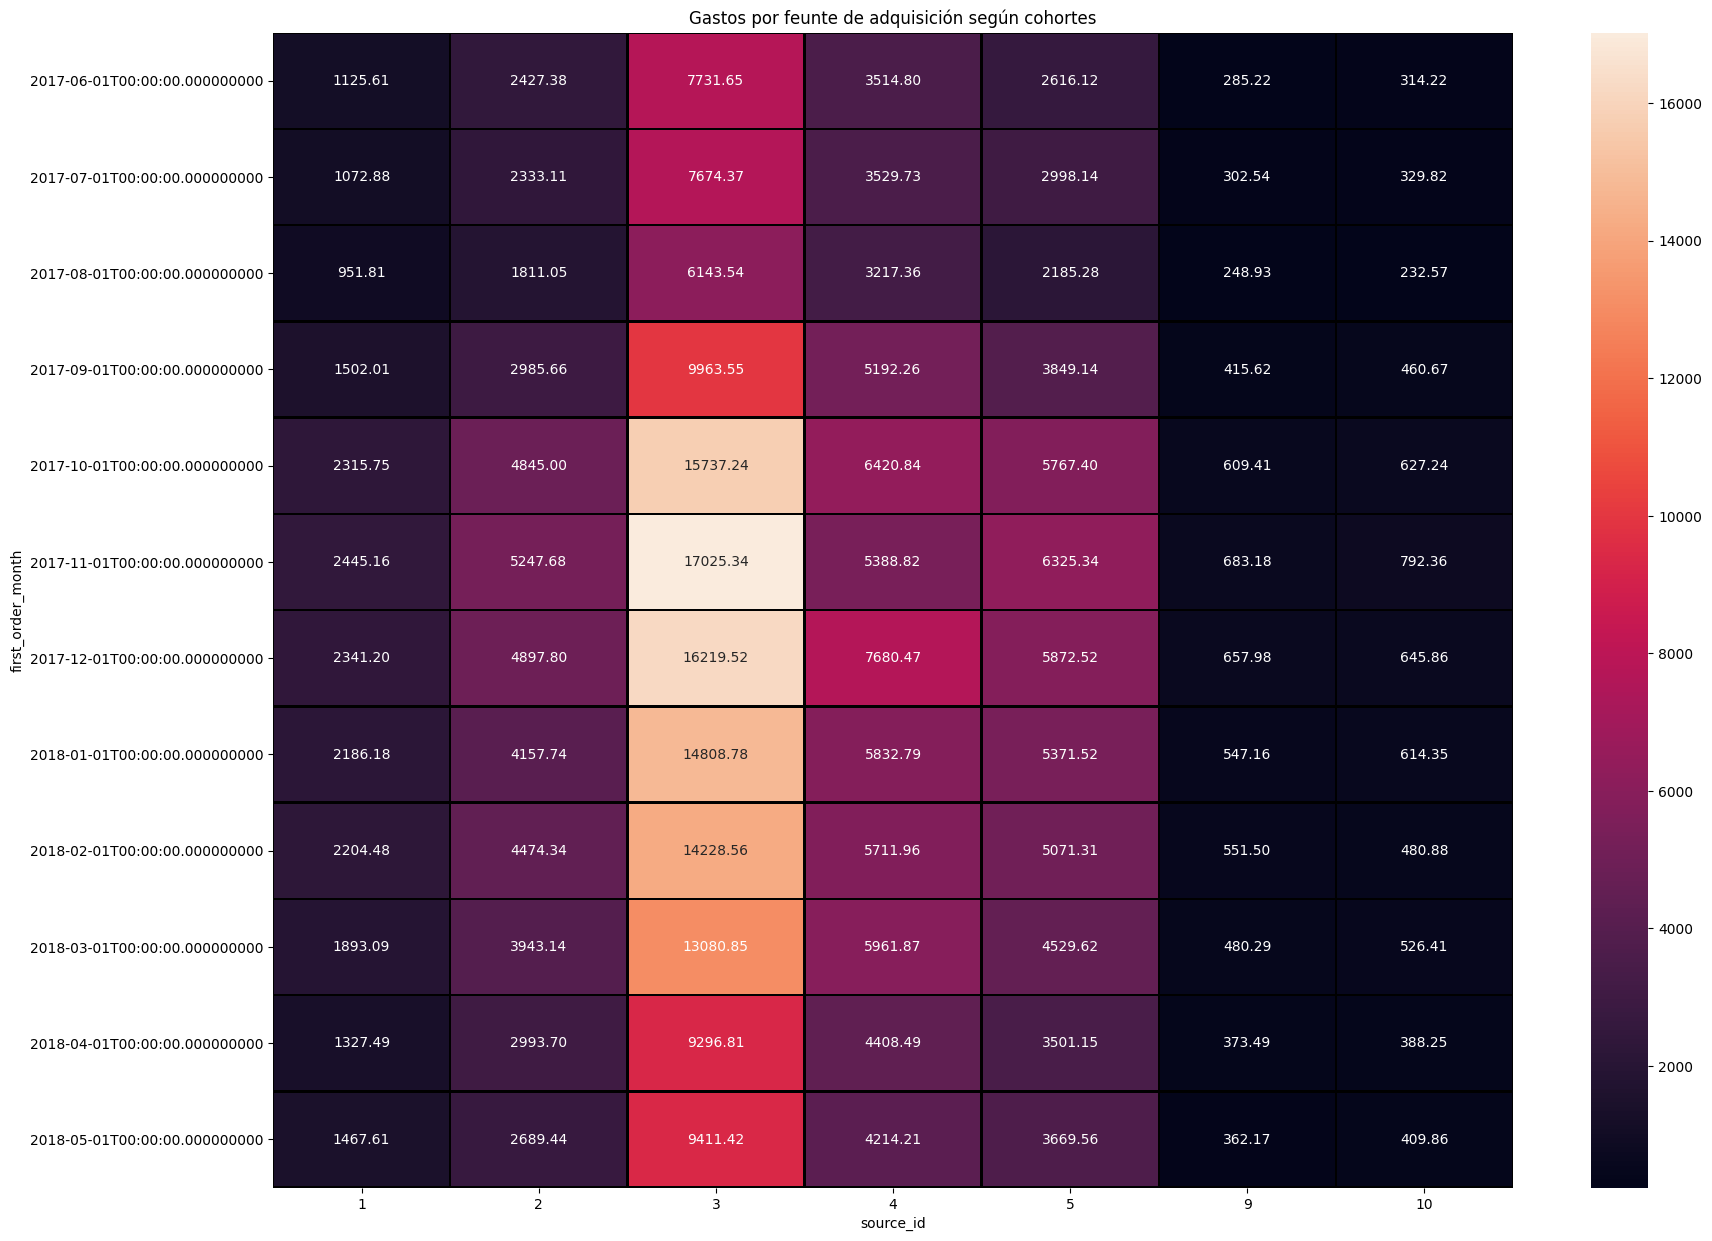

In [110]:
#Graficamos para mejorar la visualización 
plt.figure(figsize=(20, 15))
plt.title('Gastos por feunte de adquisición según cohortes')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

In [111]:
#Obtenemos los ingresos de cada fila
Report_per_month_source['incomes_per_source'] = Report_per_month_source['revenue_per_source']/Report_per_month_source['buyers_per_source']

In [112]:
#Obtenemos el CAC
Report_per_month_source['cac_per_source'] = Report_per_month_source['costs_per_source']/Report_per_month_source['buyers_per_source']

In [113]:
#Obtenemos el ROMI para cada fuente 
Report_per_month_source['romi_per_source'] = Report_per_month_source['incomes_per_source']/Report_per_month_source['cac_per_source']

In [114]:
output2 = Report_per_month_source.pivot_table(
    index='first_order_month', columns='source_id', values='romi_per_source', aggfunc='mean'
)
output2.cumsum(axis=1).round(2)
output2.fillna(' ')

source_id,1,2,3,4,5,9,10
first_order_month,,,,,,,
2017-06-01,5.679045,1.612957,0.470834,1.420471,1.673333,1.655389,0.767806
2017-07-01,3.115465,1.010484,0.490078,0.919793,0.956550,1.210352,0.564308
2017-08-01,2.217785,0.564695,0.336612,0.680281,1.667562,1.451974,0.899557
2017-09-01,1.574257,1.976551,0.539898,0.875832,4.004988,2.024012,0.491957
2017-10-01,1.230737,1.022289,0.418730,0.938349,0.989198,1.452487,0.949365
2017-11-01,1.347875,0.737183,0.356397,1.475637,0.570403,0.960684,0.821205
2017-12-01,0.784944,2.881190,0.384783,0.818265,0.697736,0.873416,0.524464
2018-01-01,0.764946,0.543889,0.309861,0.723333,0.626210,0.484538,0.476813
2018-02-01,0.763854,0.435030,0.325942,0.824323,0.597625,0.769139,0.663409


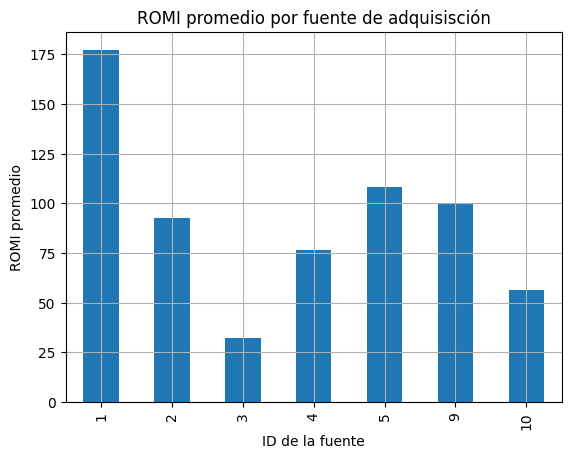

In [115]:
data_report = Report_per_month_source.groupby(['source_id'])['romi_per_source'].sum()
data_report.columns = ['source_id','romi_per_source']
data_report.plot(title='ROMI promedio por fuente de adquisisción',
                      x= 'source_id',
                      y=  'romi_per_source',
                xlabel = 'ID de la fuente', 
                ylabel = 'ROMI promedio',
                grid=True, 
                kind = 'bar', 
                legend = False
                )
plt.show()

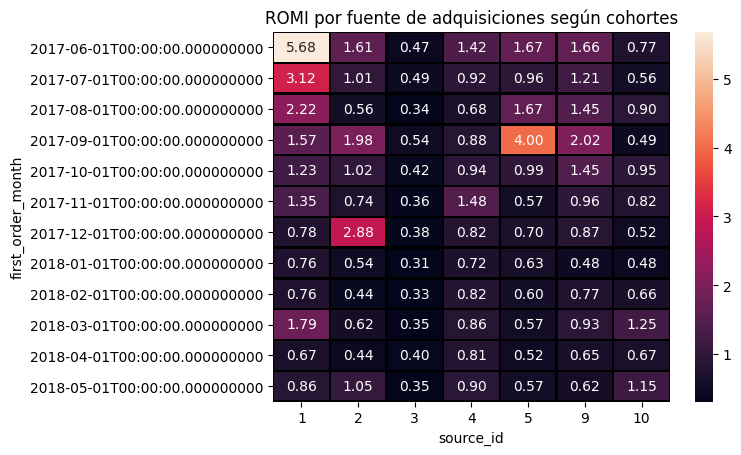

In [116]:
#Graficamos los datos obtenidos por cohortes
plt.title('ROMI por fuente de adquisiciones según cohortes')
sns.heatmap(
    output2,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Observamos que la fuente 1 tiene mejor rendimiento general, siendo el primer cohorte de junio el que mejor respuesta tuvo ante la misma, seguida de la fuente 5 que tuvo mayor impacto en septiembre, sin emabrgo la fuente 3 que es la que mayores gastos dió tanto en genral como por cohortes, a continución se agrupará el ROMI de cada fuentes por me de adquisición de las cohortes para obtener un mejor panorama.  

In [117]:
# Calcular revenue por primer mes, primera fuente y mes 
rev_buyers = orders.groupby(['first_order_month','first_source','order_month'])['Revenue'].sum().reset_index()
# Calcular tamaño cohorte por fuente
n_buyers = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
# Unir data anterior
data_buyers = pd.merge(rev_buyers,n_buyers,how='left',on=['first_source','first_order_month'])
# Calcular edad
data_buyers['age'] = (
    (data_buyers['order_month'] - data_buyers['first_order_month']) / np.timedelta64(1, 'M')
).round().astype('int')
# Calcular costos mensuales
costs_monthly = costs.groupby(['source_id','month'])['costs'].sum()
# Juntar costos para obtener dataset final
data_buyers = pd.merge(data_buyers,costs_monthly,left_on=['first_source','order_month'], right_on=['source_id','month'])
#Calcular romi
data_buyers['romi']=data_buyers['Revenue']/data_buyers['costs']

In [118]:
# SOURCE 1
SOURCE_1 = data_buyers.query('first_source==1').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [119]:
source_1_output = SOURCE_1.fillna(' ')

source_1_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.22,1.61,2.05,2.53,2.88,3.04,3.25,3.47,3.66,3.83,4.0,4.22
2017-07-01,1.09,1.27,1.84,1.95,2.0,2.07,2.1,2.14,2.22,2.34,2.44,
2017-08-01,0.89,0.98,1.03,1.07,1.12,1.16,1.19,1.35,1.54,1.6,,
2017-09-01,0.91,1.09,1.14,1.23,1.23,1.24,1.25,1.3,1.39,,,
2017-10-01,0.88,1.03,1.07,1.13,1.14,1.16,1.2,1.28,,,,
2017-11-01,0.98,1.06,1.2,1.33,1.36,1.39,1.4,,,,,
2017-12-01,0.65,0.7,0.74,0.78,0.79,0.81,,,,,,
2018-01-01,0.63,0.64,0.66,0.83,0.84,,,,,,,
2018-02-01,0.58,0.73,0.74,0.81,,,,,,,,


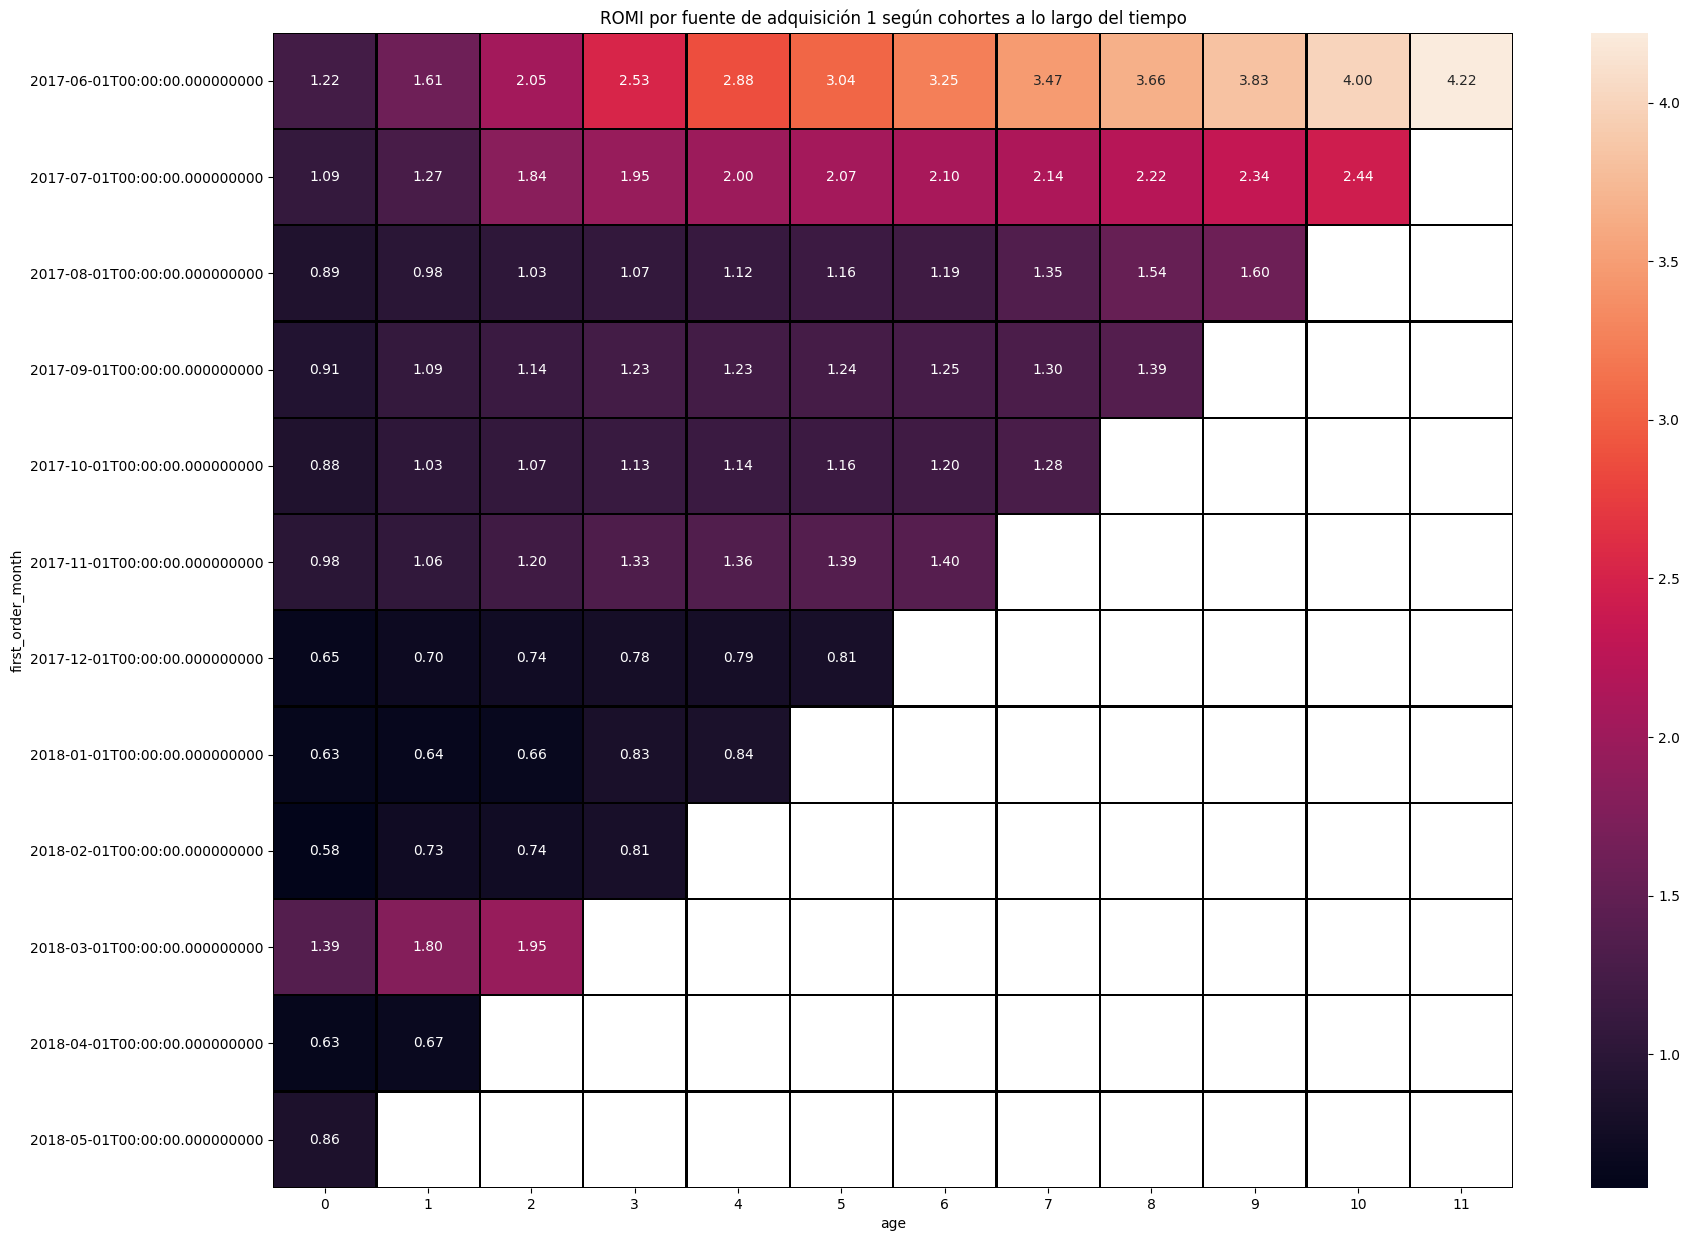

In [120]:
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 1 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_1,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Observamos que para la fuente de adquisición  1 le primera cohorte tiene lo mejores resultados con un ROMI de 4 veces, a pesar de mostrar resultados inferiores las demás cohortes lograron obtener un retorno de inversión favorable.

In [121]:
# SOURCE 2
SOURCE_2 = data_buyers.query('first_source==2').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [122]:
source_2_output = SOURCE_2.fillna(' ')
source_2_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.48,0.51,0.67,0.75,0.79,0.87,0.95,1.02,1.06,1.17,1.21
2017-07-01,0.75,0.84,0.84,0.86,0.87,0.88,0.9,0.9,0.91,0.93,0.95,
2017-08-01,0.39,0.43,0.43,0.44,0.45,0.45,0.46,0.47,0.47,0.47,,
2017-09-01,0.61,0.98,1.08,1.12,1.2,1.25,1.43,1.49,1.53,,,
2017-10-01,0.63,0.81,0.87,0.92,0.97,0.99,1.01,1.04,,,,
2017-11-01,0.53,0.6,0.65,0.72,0.75,0.77,0.79,,,,,
2017-12-01,0.69,0.83,1.62,2.69,3.08,3.54,,,,,,
2018-01-01,0.31,0.38,0.5,0.53,0.56,,,,,,,
2018-02-01,0.35,0.4,0.43,0.46,,,,,,,,


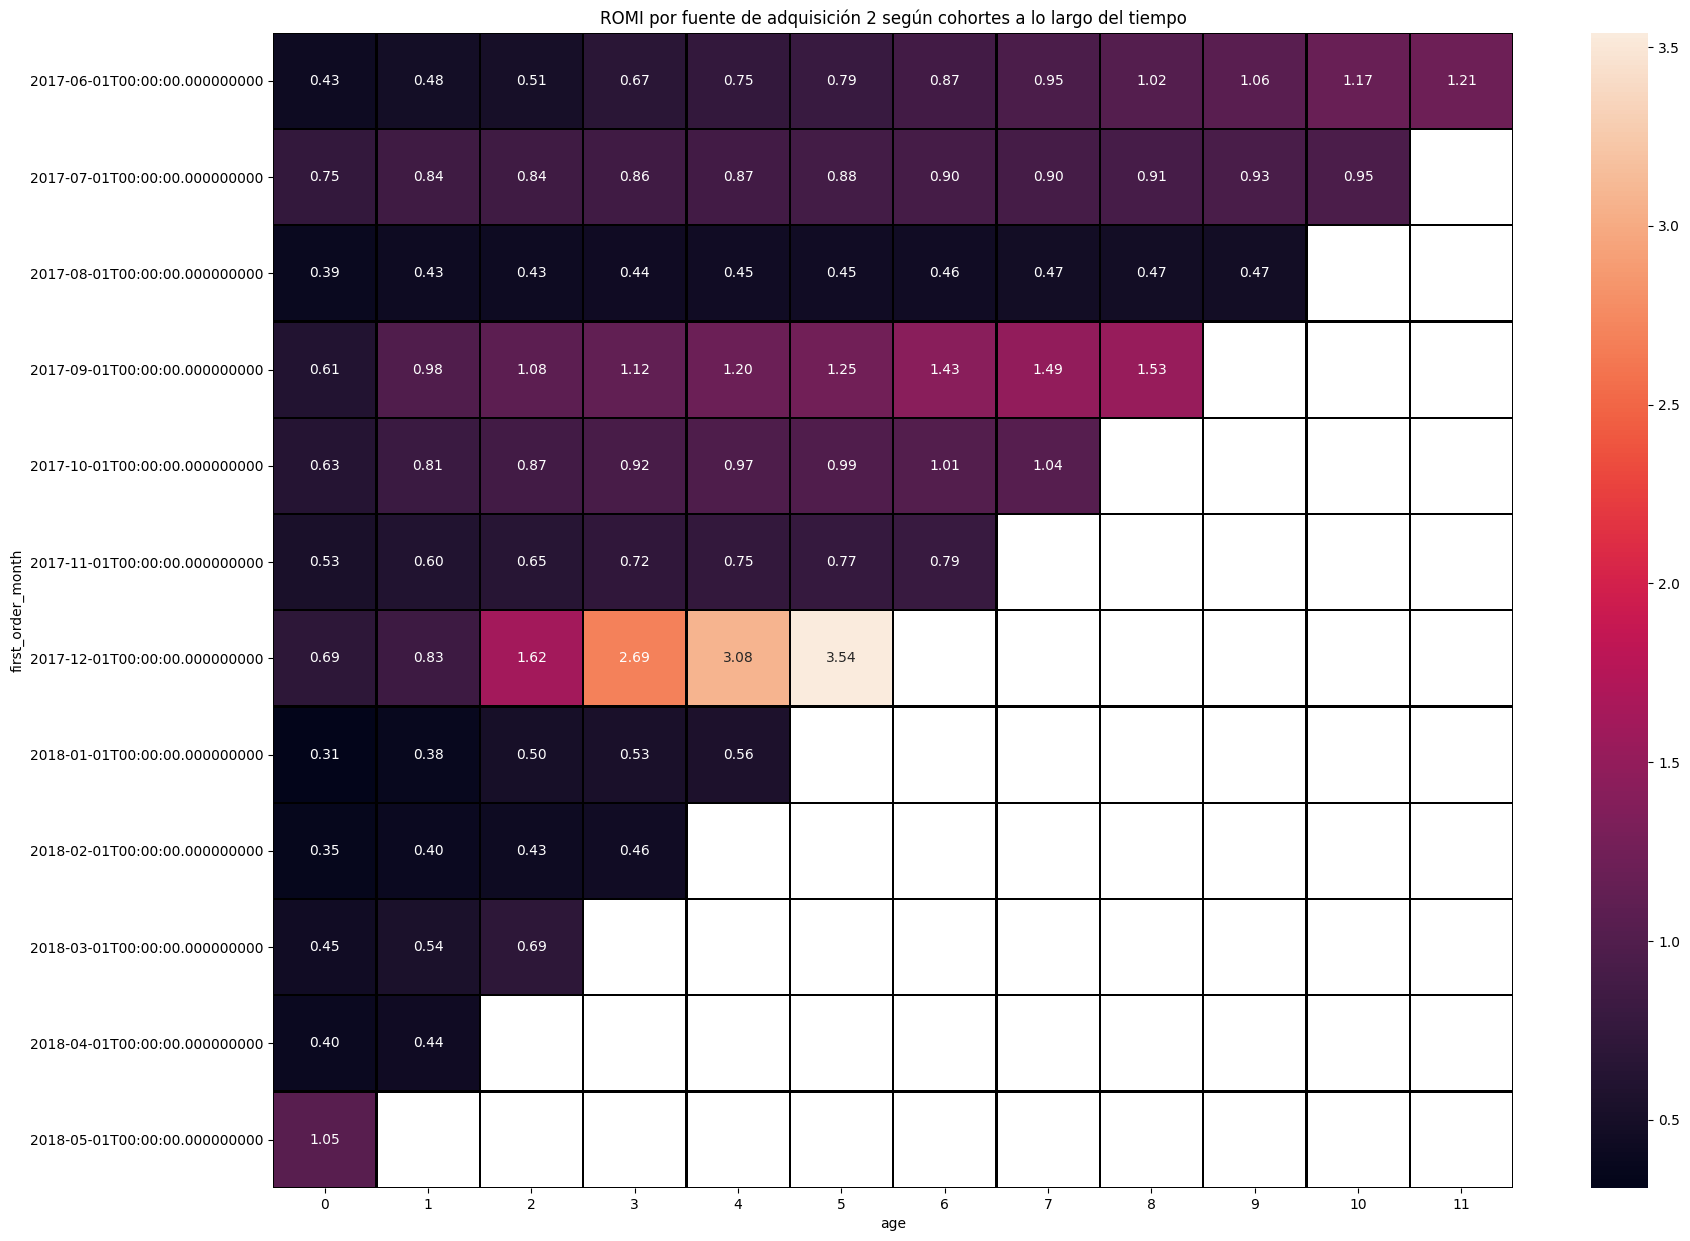

In [123]:
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 2 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_2,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

En este caso observamos que la cohorte de diciembre de 2017 es la que obtuvo mejores resultados conun ROMI de hasta 3.5, sin emabargo para este caso vemos que a  algunas les costó obtener resultados favorables y otras no han recuperado su inversión


In [124]:
# SOURCE 3
SOURCE_3 = data_buyers.query('first_source==3').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)


In [125]:
source_3_output = SOURCE_3.fillna(' ')
source_3_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.36,0.37,0.39,0.41,0.42,0.43,0.43,0.43,0.43,0.44,0.44,0.44
2017-07-01,0.41,0.43,0.44,0.45,0.45,0.45,0.45,0.46,0.46,0.46,0.47,
2017-08-01,0.28,0.28,0.29,0.29,0.3,0.3,0.3,0.3,0.3,0.31,,
2017-09-01,0.44,0.45,0.46,0.47,0.48,0.49,0.49,0.5,0.51,,,
2017-10-01,0.35,0.38,0.39,0.39,0.4,0.41,0.41,0.42,,,,
2017-11-01,0.32,0.33,0.34,0.35,0.36,0.36,0.36,,,,,
2017-12-01,0.34,0.35,0.36,0.38,0.39,0.4,,,,,,
2018-01-01,0.28,0.29,0.3,0.31,0.32,,,,,,,
2018-02-01,0.29,0.32,0.33,0.33,,,,,,,,


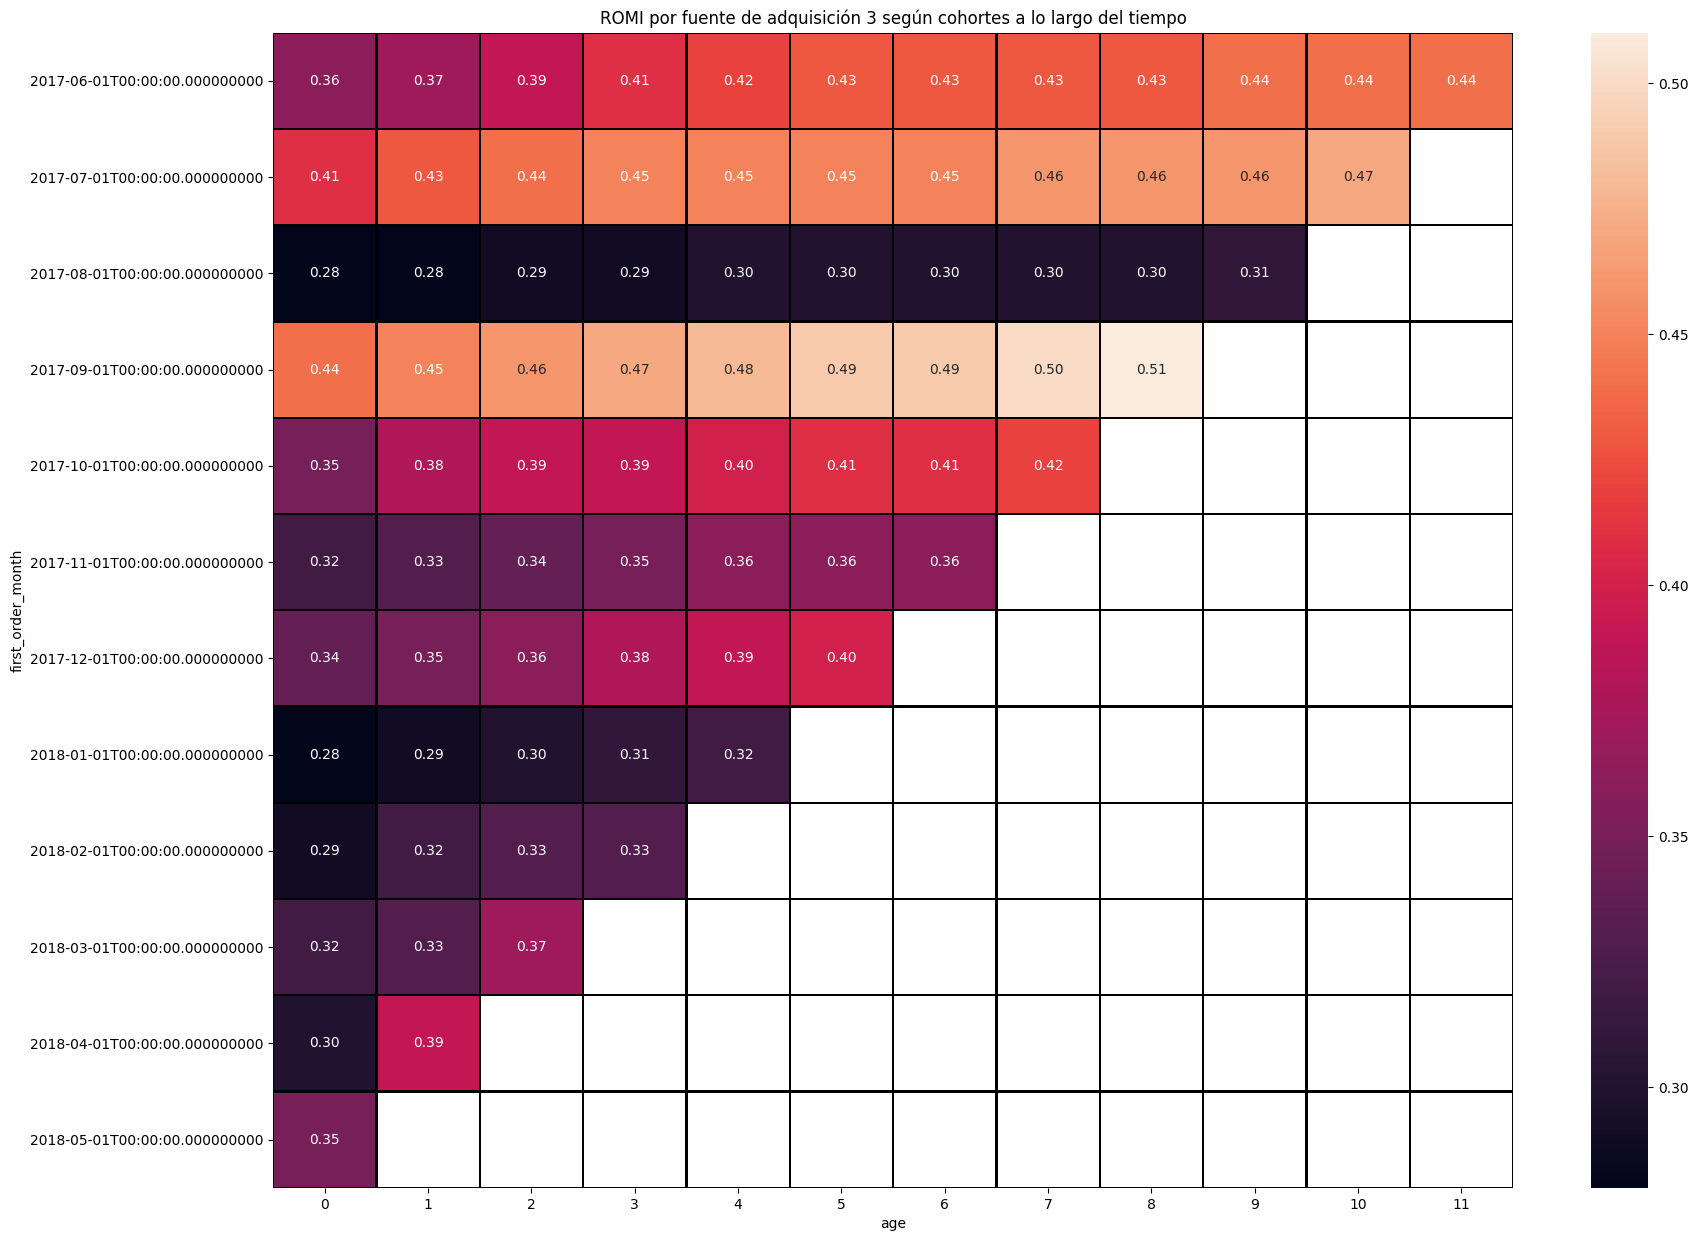

In [126]:
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 3 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_3,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Nuevamente observamos el patrón descrito con anterioridad para la fuente 3 ya que obtuvo resultados poco favorables en las cohortes a lo largo del tiempo.

In [127]:
# SOURCE 4
SOURCE_4 = data_buyers.query('first_source==4').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [128]:
source_4_output = SOURCE_4.fillna(' ')
source_4_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.56,0.56,0.58,0.62,0.69,0.81,0.89,0.9,0.92,0.97,1.09,1.1
2017-07-01,0.81,0.82,0.83,0.84,0.85,0.85,0.86,0.87,0.87,0.88,0.88,
2017-08-01,0.53,0.54,0.55,0.57,0.57,0.59,0.59,0.6,0.61,0.62,,
2017-09-01,0.54,0.59,0.62,0.64,0.65,0.67,0.8,0.83,0.84,,,
2017-10-01,0.80,0.83,0.85,0.87,0.9,0.92,0.94,0.96,,,,
2017-11-01,1.12,1.22,1.24,1.33,1.36,1.38,1.44,,,,,
2017-12-01,0.75,0.77,0.79,0.81,0.82,0.85,,,,,,
2018-01-01,0.67,0.69,0.71,0.72,0.73,,,,,,,
2018-02-01,0.79,0.81,0.82,0.83,,,,,,,,


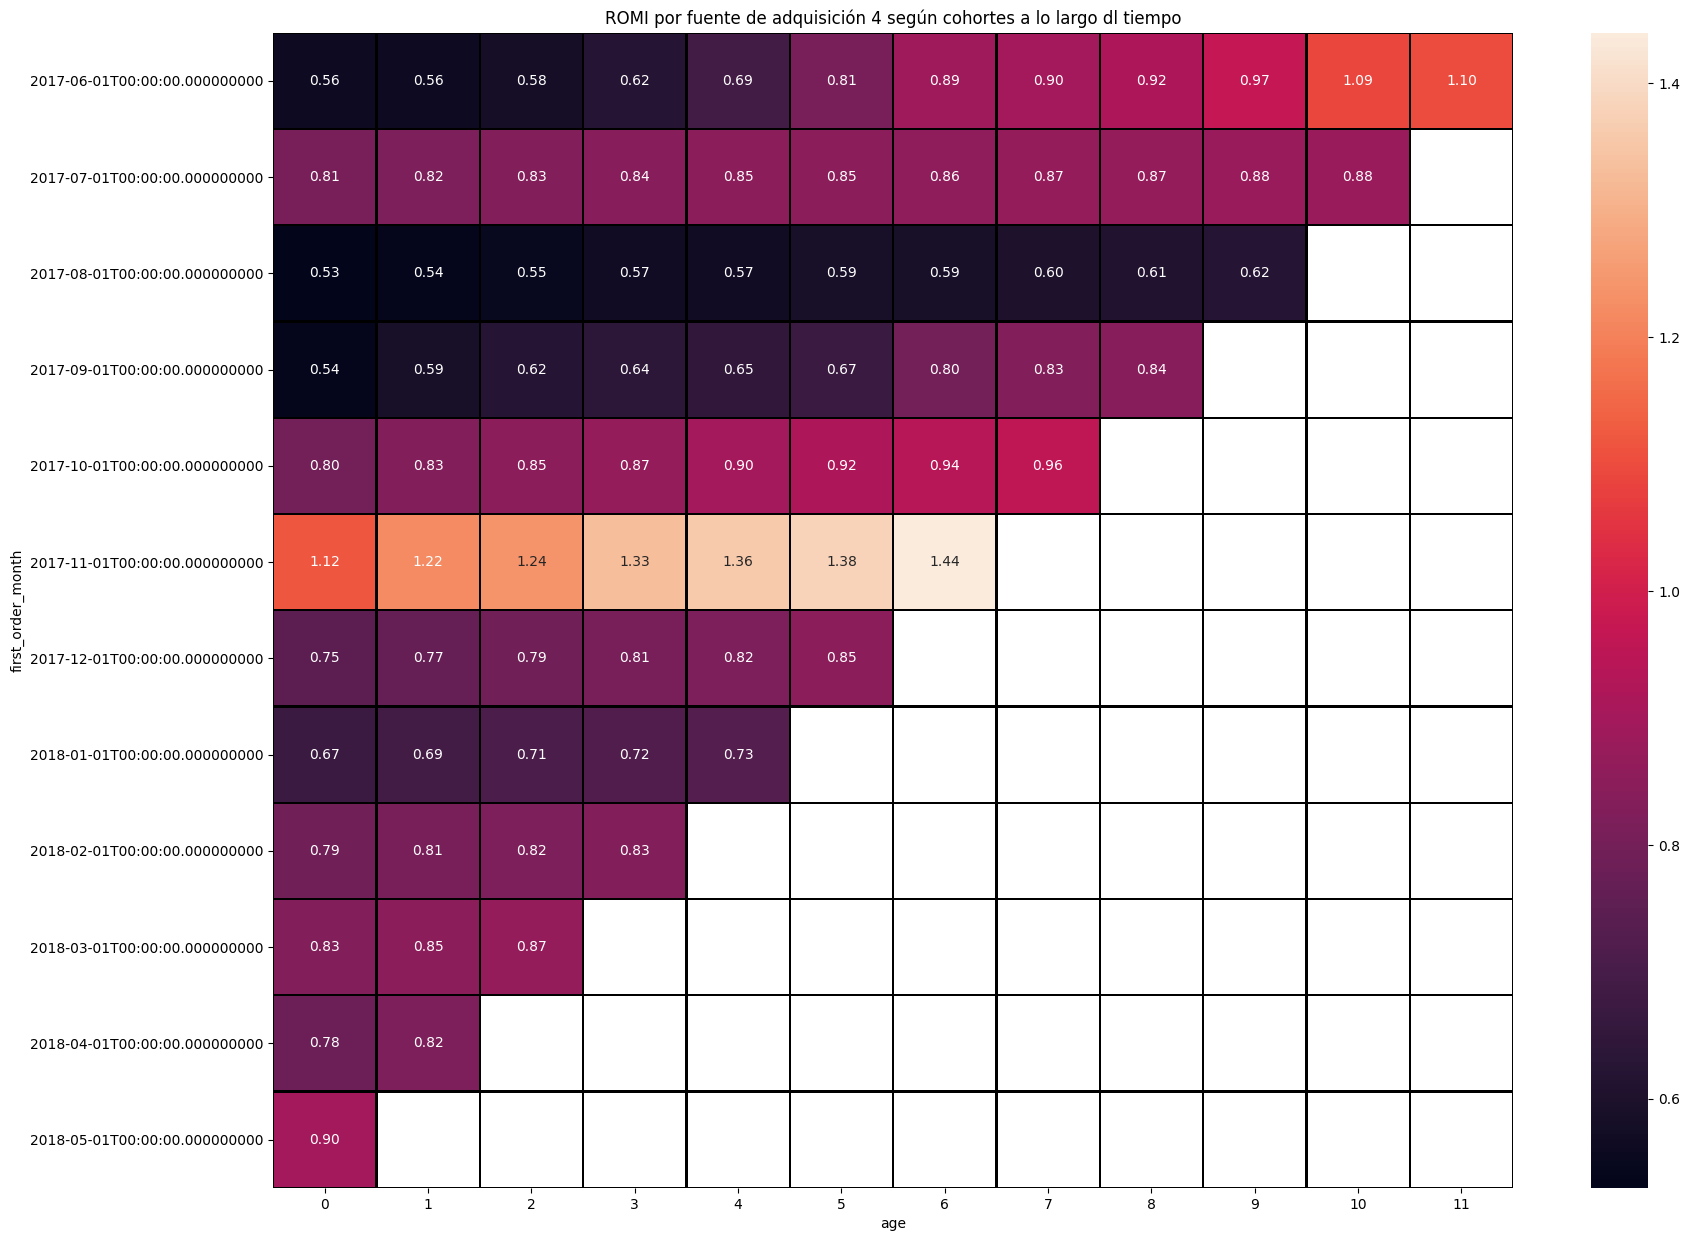

In [129]:
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 4 según cohortes a lo largo dl tiempo')
sns.heatmap(
    SOURCE_4,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Para este caso a expeción de algunas cohortes, obtuvimos que pocas cohortes son las que obtuvieron resultados favorables a lo largo de todo el tiempo de vida. Aunqu son pocas las que obtienen reultados muy poco favorables. 



In [130]:
# SOURCE 5
SOURCE_5 = data_buyers.query('first_source==5').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [131]:
source_5_output = SOURCE_5.fillna(' ')
source_5_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.73,0.84,0.92,1.01,1.05,1.07,1.13,1.17,1.21,1.29,1.31,1.32
2017-07-01,0.75,0.81,0.86,0.87,0.88,0.88,0.89,0.89,0.9,0.91,0.92,
2017-08-01,0.83,0.9,0.95,0.99,1.06,1.1,1.13,1.15,1.17,1.2,,
2017-09-01,0.95,0.97,1.0,2.62,2.7,2.94,2.97,3.01,3.01,,,
2017-10-01,0.83,0.87,0.89,0.91,0.93,0.95,0.99,1.02,,,,
2017-11-01,0.50,0.52,0.54,0.54,0.57,0.57,0.59,,,,,
2017-12-01,0.66,0.68,0.69,0.7,0.7,0.71,,,,,,
2018-01-01,0.51,0.58,0.63,0.64,0.64,,,,,,,
2018-02-01,0.58,0.59,0.6,0.6,,,,,,,,


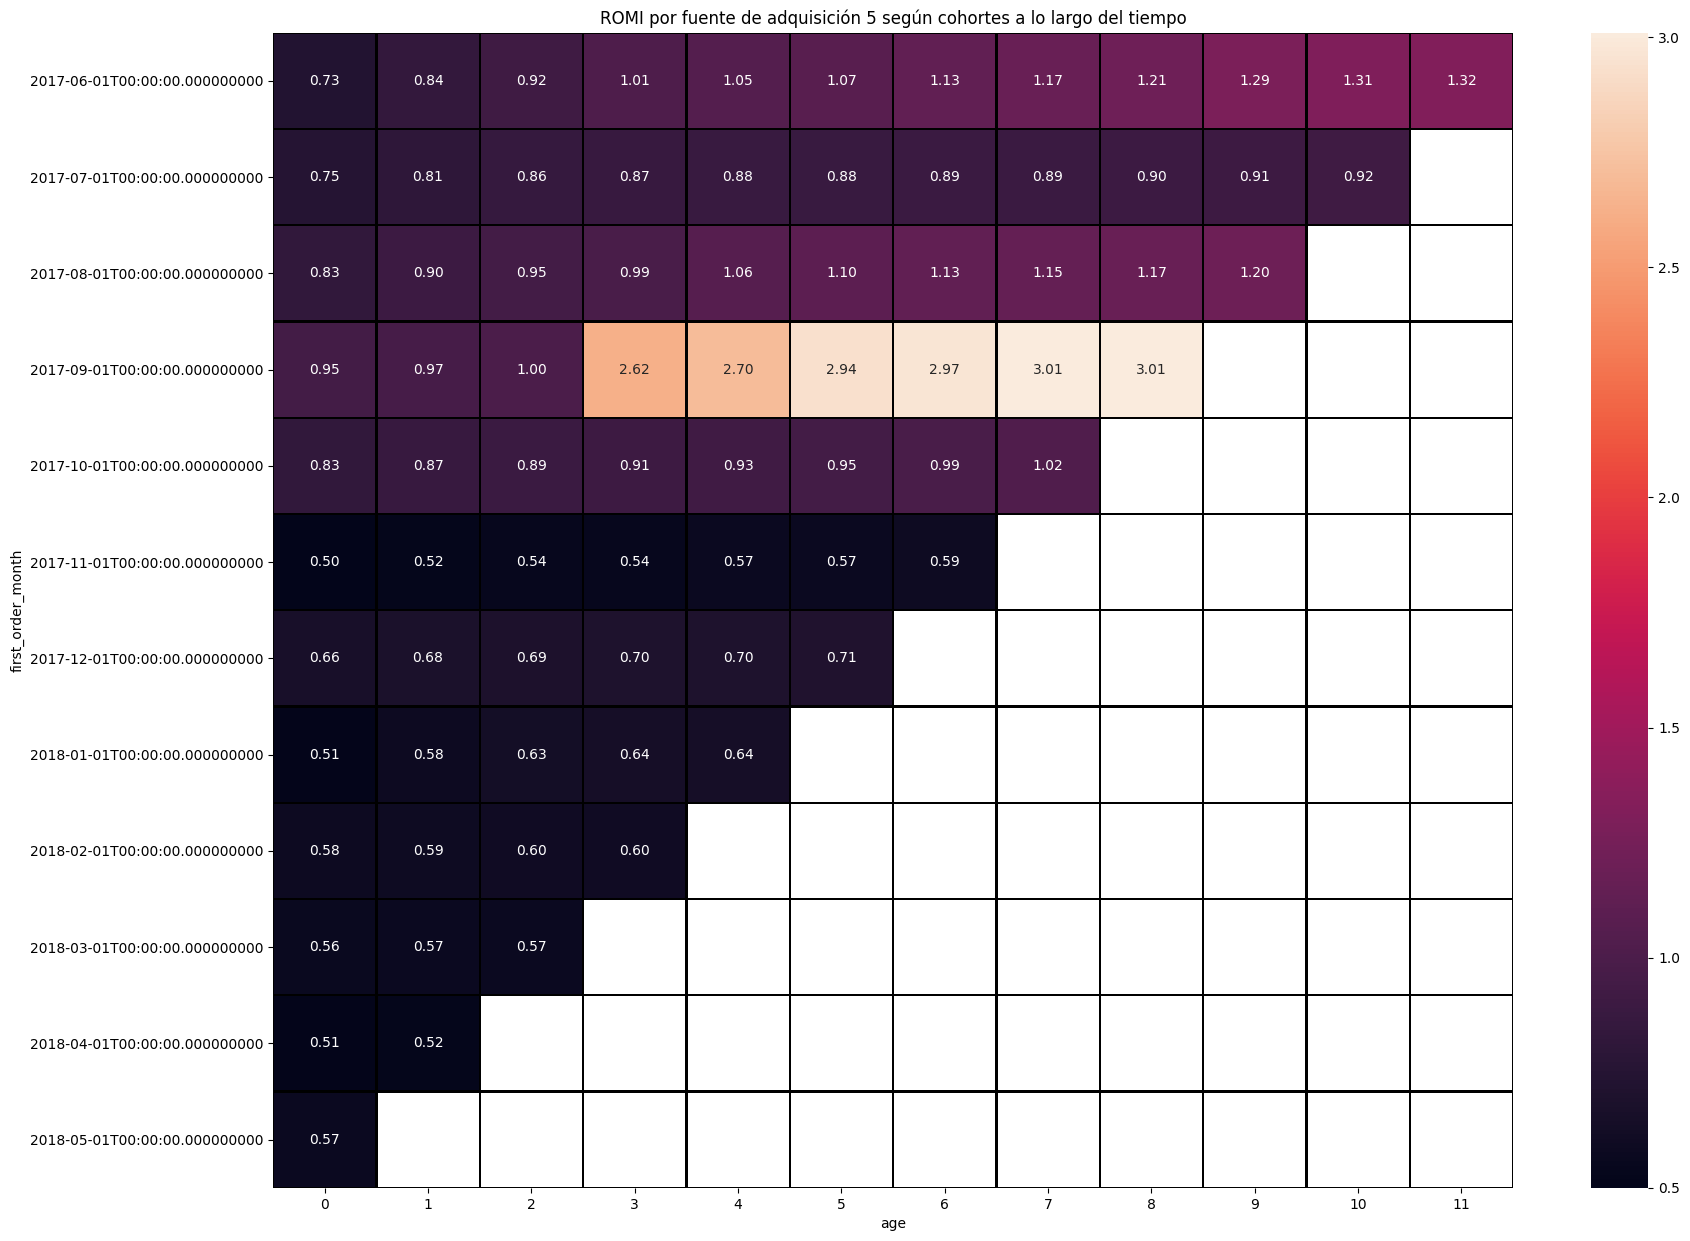

In [132]:
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 5 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_5,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Para este caso particular las cohortes tienen resultados positivos al principio hasta octubre del 2017, sin el rendimiento baja considerablemente en las cohortes posteriores

In [133]:
# SOURCE 9
SOURCE_9 = data_buyers.query('first_source==9').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [134]:
source_9_output = SOURCE_2.fillna(' ')
source_9_output

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.48,0.51,0.67,0.75,0.79,0.87,0.95,1.02,1.06,1.17,1.21
2017-07-01,0.75,0.84,0.84,0.86,0.87,0.88,0.9,0.9,0.91,0.93,0.95,
2017-08-01,0.39,0.43,0.43,0.44,0.45,0.45,0.46,0.47,0.47,0.47,,
2017-09-01,0.61,0.98,1.08,1.12,1.2,1.25,1.43,1.49,1.53,,,
2017-10-01,0.63,0.81,0.87,0.92,0.97,0.99,1.01,1.04,,,,
2017-11-01,0.53,0.6,0.65,0.72,0.75,0.77,0.79,,,,,
2017-12-01,0.69,0.83,1.62,2.69,3.08,3.54,,,,,,
2018-01-01,0.31,0.38,0.5,0.53,0.56,,,,,,,
2018-02-01,0.35,0.4,0.43,0.46,,,,,,,,


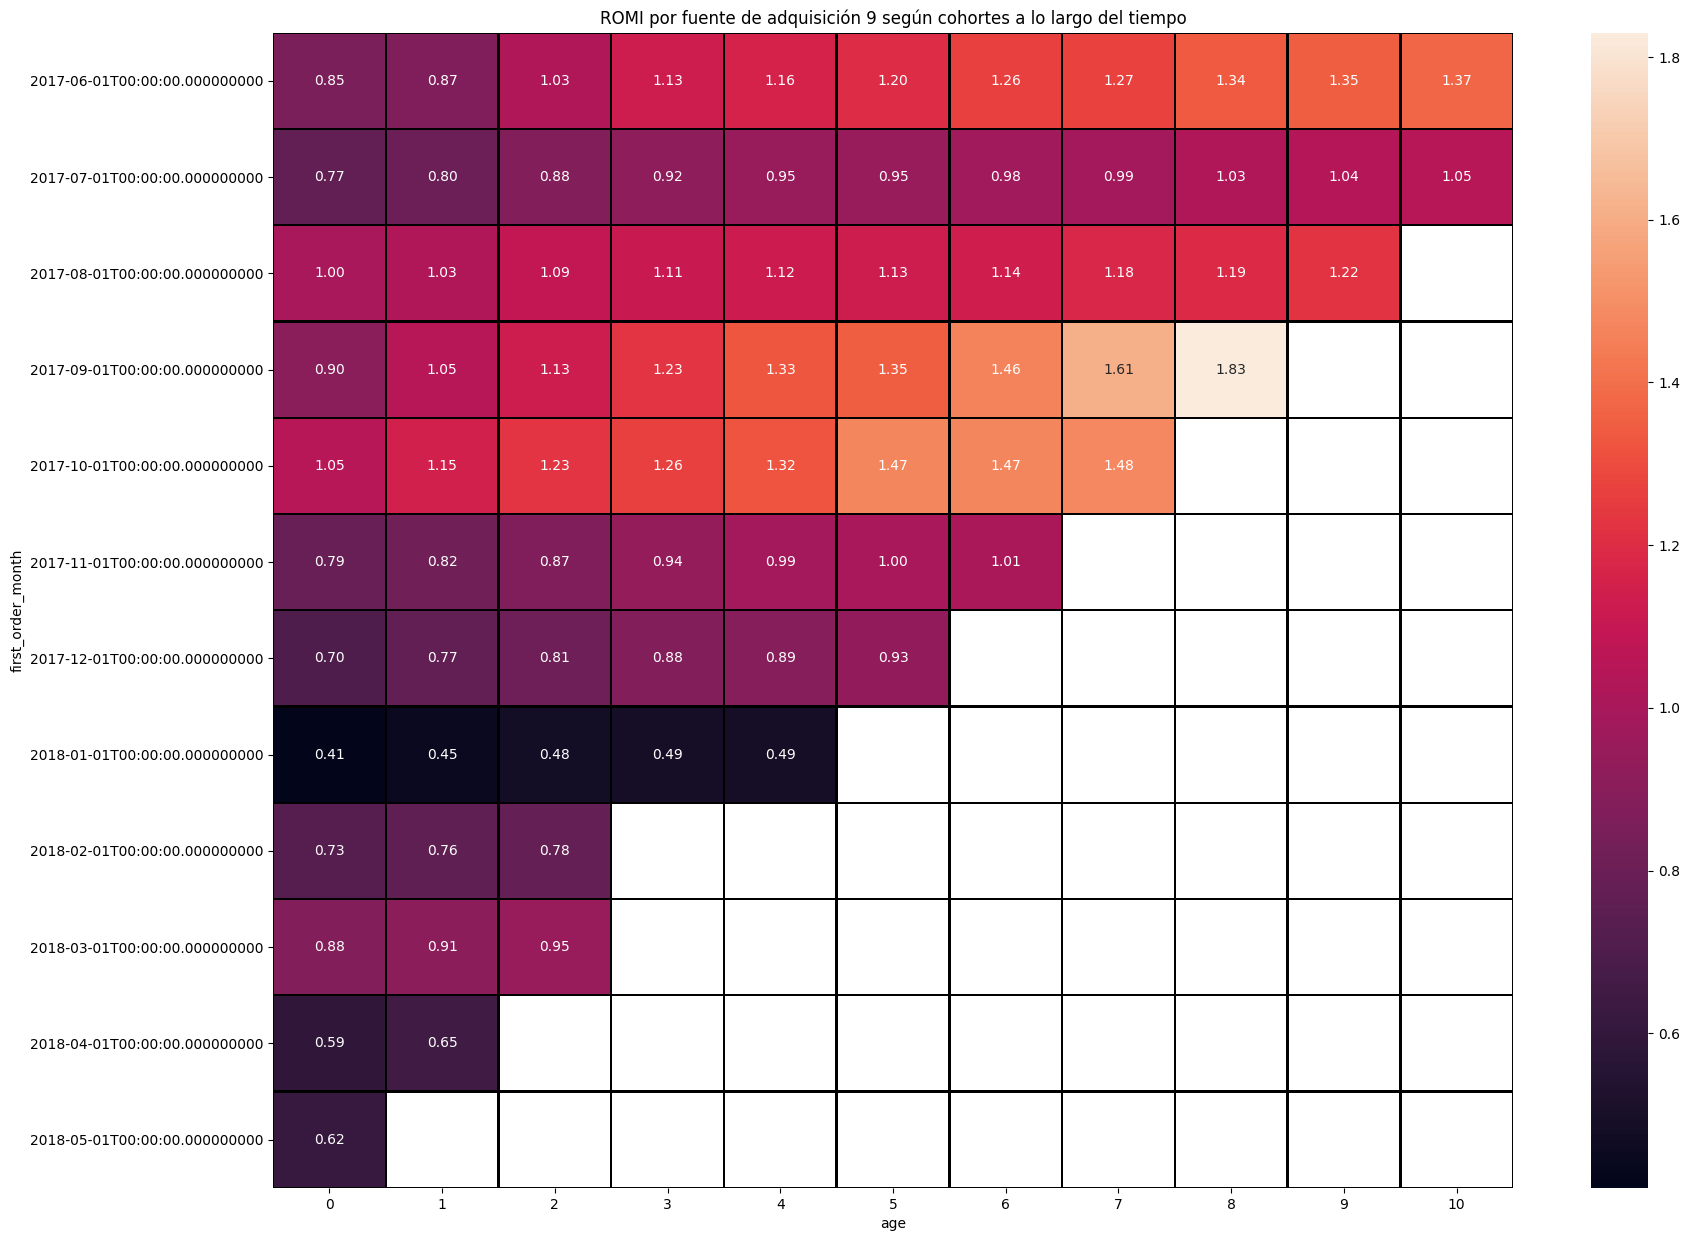

In [135]:
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 9 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_9,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Observamos un caso similar a la cohorte 5 donde a partir de la cohorte
octubre 2017 baja el redimiento


In [136]:
# SOURCE 10
SOURCE_10 = data_buyers.query('first_source==10').pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

In [137]:
source_10_output = SOURCE_2.fillna(' ')
source_10_output


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.43,0.48,0.51,0.67,0.75,0.79,0.87,0.95,1.02,1.06,1.17,1.21
2017-07-01,0.75,0.84,0.84,0.86,0.87,0.88,0.9,0.9,0.91,0.93,0.95,
2017-08-01,0.39,0.43,0.43,0.44,0.45,0.45,0.46,0.47,0.47,0.47,,
2017-09-01,0.61,0.98,1.08,1.12,1.2,1.25,1.43,1.49,1.53,,,
2017-10-01,0.63,0.81,0.87,0.92,0.97,0.99,1.01,1.04,,,,
2017-11-01,0.53,0.6,0.65,0.72,0.75,0.77,0.79,,,,,
2017-12-01,0.69,0.83,1.62,2.69,3.08,3.54,,,,,,
2018-01-01,0.31,0.38,0.5,0.53,0.56,,,,,,,
2018-02-01,0.35,0.4,0.43,0.46,,,,,,,,


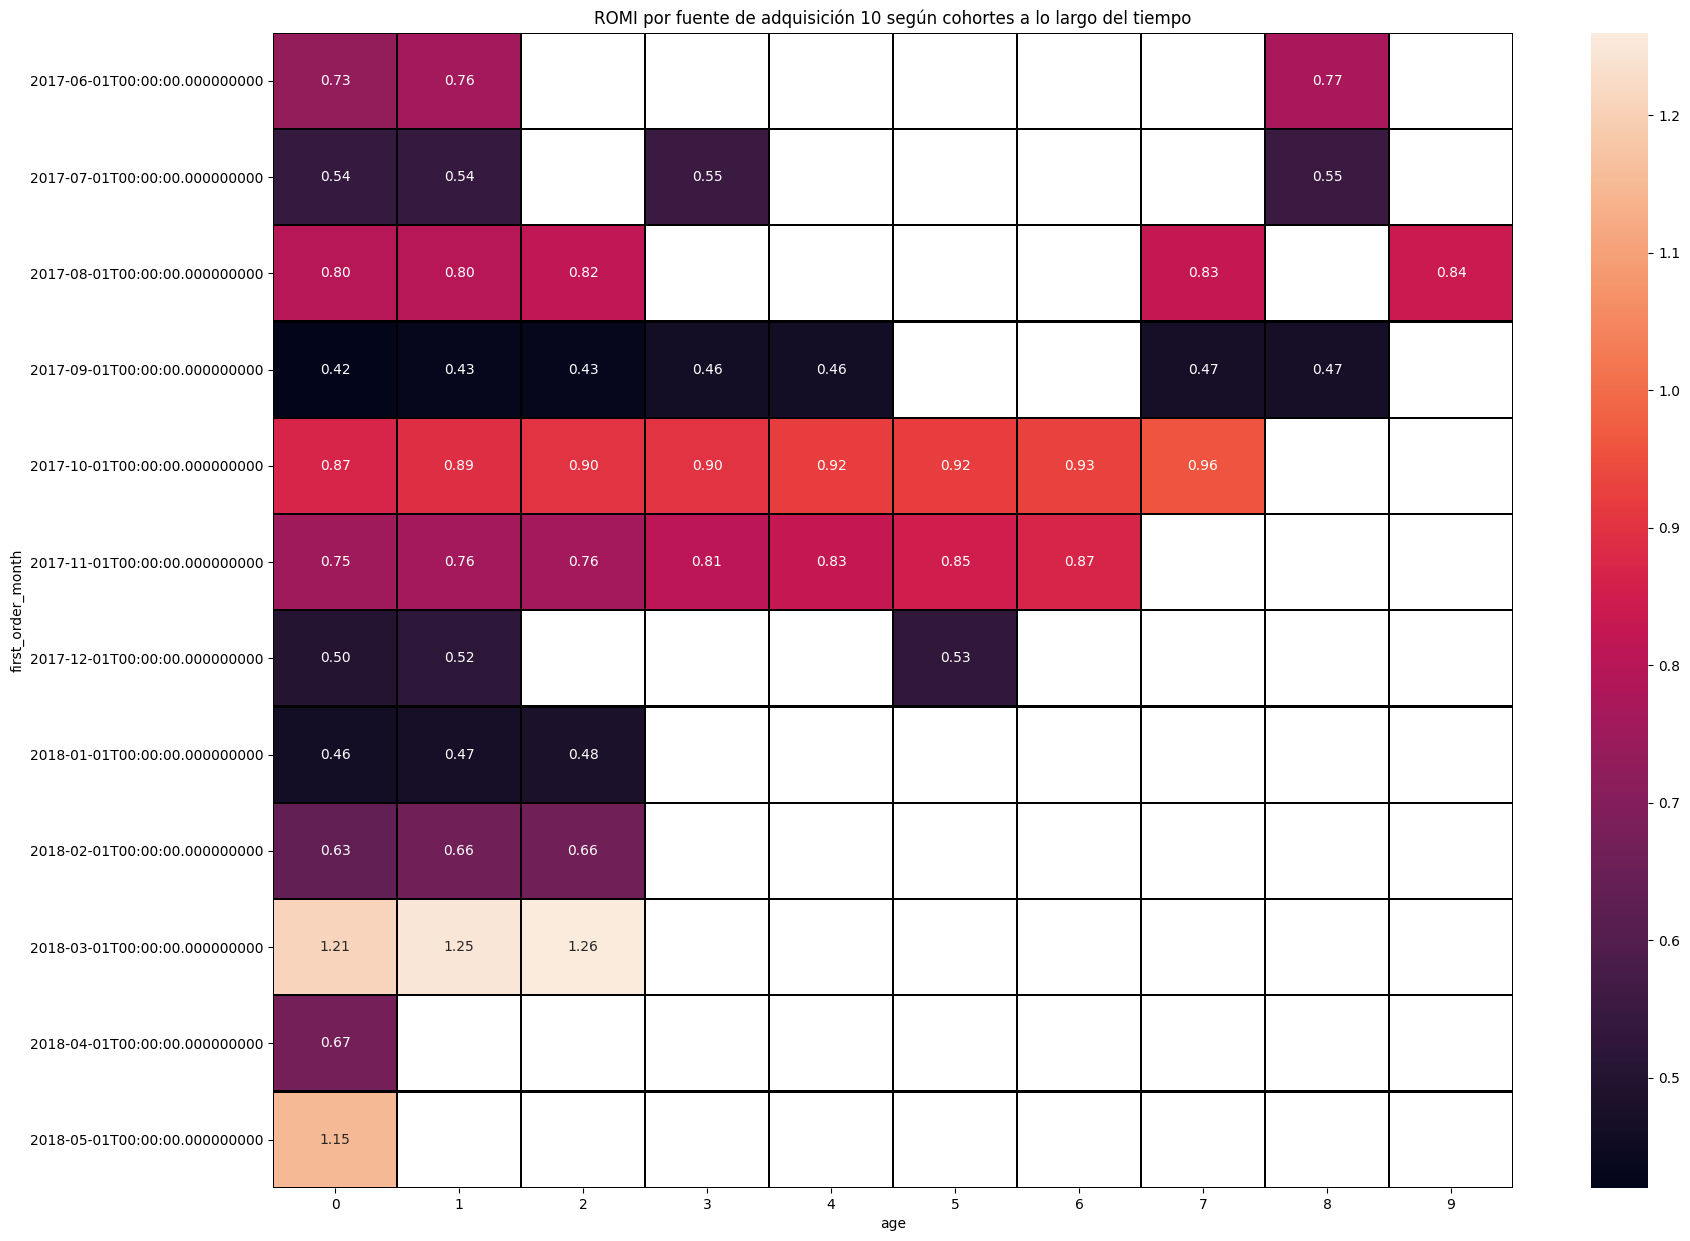

In [138]:
#Graficamos para mejorar visualización.
#Graficamos para mejorar visualización.
plt.figure(figsize=(20, 15))
plt.title('ROMI por fuente de adquisición 10 según cohortes a lo largo del tiempo')
sns.heatmap(
    SOURCE_10,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

En este caso las ultimas cohortes son las de mejor rendimiento, siendo que hay cohortes con intermitencia en el uso se podría deber a qu se trata de alguan fuente muy específica

#### Hallazgos sobre análisis de marketing
Al observar el análisis de costos tenemos en primer lugar que al fuente con ID 3 es la que más costos de adquisisción tiene, siendo la 9 y 10 aquellas con menores costes. 
Al agrupar por fechas del dataset vemos picos de costes en diciembre del 2017, teniendo igaulemente coincidencia con los datos de visitas y ventas donde observamso un pico a finales de año, por lo que podríamos teorizar que este crecimiento se debió a un crecimiento en las campañas. 
Igualmente al agrupar los costos por mes vemos que los picos  se muestran igaulmente a finales de año. 
El problema surge al calcualr el Customer Adqusition Cost, ya que observamos que este supera al Life Time Values, es decir que los costos superan a las ventas concretadas. 
Al observar los CAC por fuentes observamos que la fuente 3 y 2 tiene el mayor coste siendo que se tiene costos adecuados en el caso de la fuente 3 pero se ven costos algo elevados para las fuente 2. 
Pero para poder sacar conclusiones calculamos el ROI (return odf investment), aquí vemos que las fuentes más redituables son la 1 y 2, siendo la 3 la menos redituable a pesr de ser la que genera más costos de adquisisción. 

## Conclusiones 
En este análisis vemos que la ventas y visitas tienen un repunte a finales de año lo que inidca que se debe poner atención  a esas fechas, 
para este caso se recomienda poner especial atención a las plataformas 1 y 2. 
Vemos que en el caso de las fechas de las campañas está correcto ya que ls picos de inversión coinciden con aquellos de las compras, por lo que en este caso , se tiene una buena referencia en cuanto a las fechas. 
Ahora bien, exsite un problema general en cuanto al CAC y el LTV, ya que este último es menor que el primero, lo que significa que a la empresa le cuesta más atraer clientes, siendo que estos no reflejan los ingresos esperados. 
Sin embargo, vemos que al agrupar esta métrica por meses se obtiene una tendencia a la alza lo que nos podría indicar que los cleintes de la empresa, si tienen una retención positiva, siendo el punto más alto a finales de año, tal como en casos anteriores, donde existen más ventas y por ende el tipo de campañas a fin de año son aquellas a las que deberái ponerse más atención ya que son las que  nos generan más ventas, visitas y mejores indicadores en las métricas, sería interesante agrupar futuros datos de años posteriores para saber si se mantiene esta tendencia o se trato de un caso exepcional para este año. 
Finalemnte enfocandosé en las métricas CAC, LTV y ROMI enfocado a las fuentes de adquisición observamos que el problema entre las métricas generales de LTV y CAC se deba a este apartado. 
Esto debido a que se observa que la funte de adquisisción a la que más presuúesto se le asigna es a la fuente con ID 3, superando por mucho a otras fuentes, siendo que la única con un presupuesto ligeramente menor es la número 2. 
Al calcular el ROMI y agruaprlo por fuentes podemos observar que precisamente la fuente 3 (la de mayor presupuesto) es la que menos cantida de ingresos y ROMI genera. Siendo que otras fuentes como la de ID 2 tiene mejor rendimeinto con un costo menor. 
La recomendación en este caso, es de cierta manera redistribuir el presupuesto del área de marketing ya que como obsrevamos hay retención correcta en cuanto a fechas y meses, siendo el problema no cuando se invierte sino más bien donde. 
Para este caso, se podría tratar de redistribuir el costo y presupuesto designado a la funte de adquisición 3 que supera con creces otras fuentes y asignarlo a otra variable como las 2 y 5 que com vimos tienen costes menores pero mejores rendimientos, siendo que pueden igualar en un futuro casos más rentables como la fuente 1 que puede ser incluso inferida como crecimiento orgánico por el bajo costo pero alta tasa de retorno de inversíón. 

